In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from pyriemann.estimation import XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
from utils.feature_extraction import time_domain_features,standard_scaler_transform, wavelet_transform, bandpass_transform, psd_transform
from models.mlmodels import KNN_model_predict, LDA_model_predict, SVM_model_predict, XGB_model_predict, KNNDWN_model_predict
from utils.plots import get_metrics
from utils.dataloader import load_eeg_data_edf, load_eeg_data_gdf, load_eeg_data_mat



Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [9]:
def run_pipeline(x_data, y_data, dataset, subject, metrics_results, fs, binary=True):
    # params={'fs':fs, 'dataset':dataset, 'subject': subject, 'pipeline': 'XdawnCovariances -> TangentSpace'}
    # n_components = 2 
    # # take 50/25/25 percent of the data to train/validate/test
    
    # #------ Pipe XdawnCovariances -> TangentSpace
    # cov = XdawnCovariances(n_components)
    # tang =  TangentSpace(metric='riemann')
    # x = cov.fit_transform(x_data, y_data)
    # x = tang.fit_transform(x, y_data)
    # X_train, X_test, Y_train, Y_test = train_test_split( x, y_data, test_size=0.5, random_state=42)


    # #------------------------- KNN ---------------------------------------------------
    # y_true, y_pred, best_score = KNN_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'KNN', params))

    # #------------------------- SVM ---------------------------------------------------
    # y_true, y_pred, best_score = SVM_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'SVM', params))

    # #------------------------- XGB ---------------------------------------------------
    # y_true, y_pred, best_score = XGB_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None, binary=binary)
    # metrics_results.append(get_metrics(y_true, y_pred, best_score, 'XGB', params))




    #------ Pipe time domain features + wavelet
    params={'fs':fs, 'dataset':dataset, 'subject': subject, 'pipeline': 'time domain features -> wavelet'}
    x = time_domain_features(x_data, params['fs'])
    x = wavelet_transform(x, params)
    X_train, X_test, Y_train, Y_test = train_test_split( x, y_data, test_size=0.5, random_state=42)
    
    #------------------------- KNN ---------------------------------------------------
    y_true, y_pred, best_score = KNN_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'KNN', params))

    #------------------------- SVM ---------------------------------------------------
    y_true, y_pred, best_score = SVM_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'SVM', params))

    #------------------------- XGB ---------------------------------------------------
    y_true, y_pred, best_score = XGB_model_predict(X_train ,X_test,Y_train,Y_test, scoring=None, binary=binary)
    metrics_results.append(get_metrics(y_true, y_pred, best_score, 'XGB', params))





In [5]:
metrics_results = []

## Dataset A

### 1. Training all subjects' data at once

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)
Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


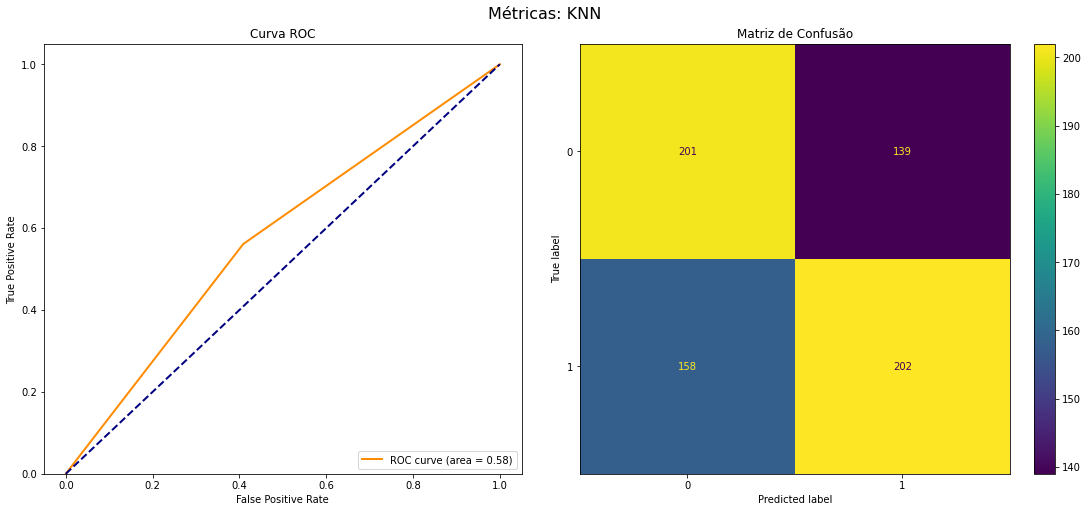

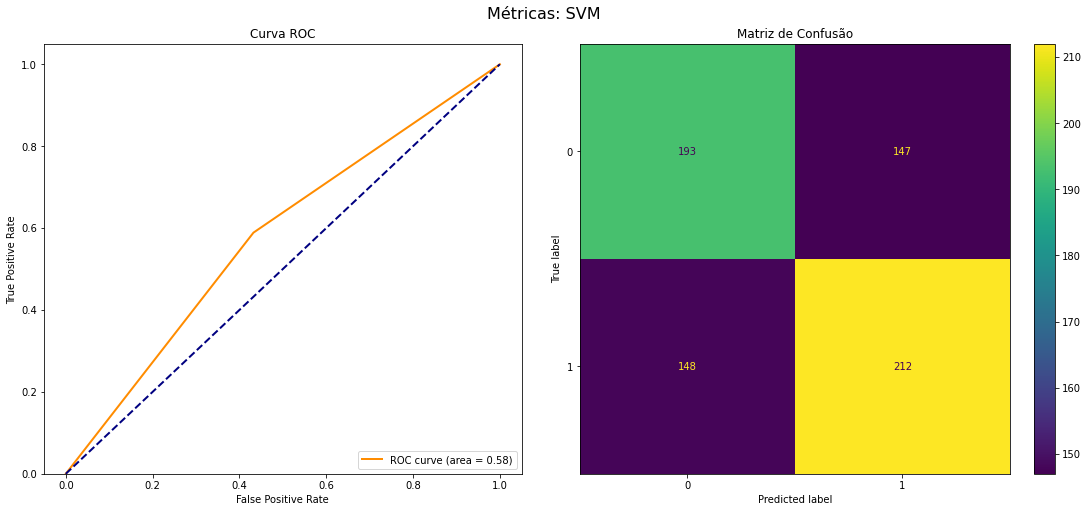

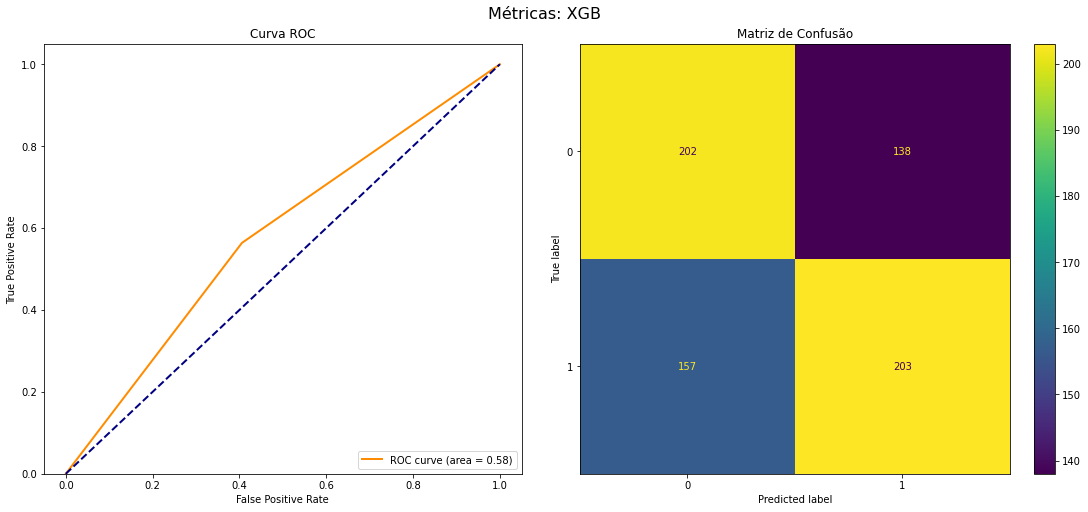

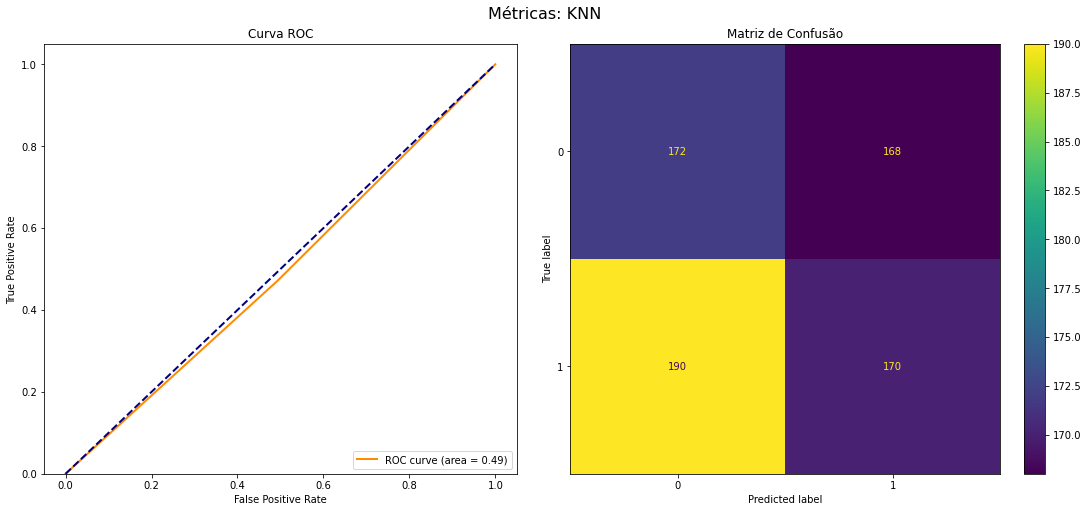

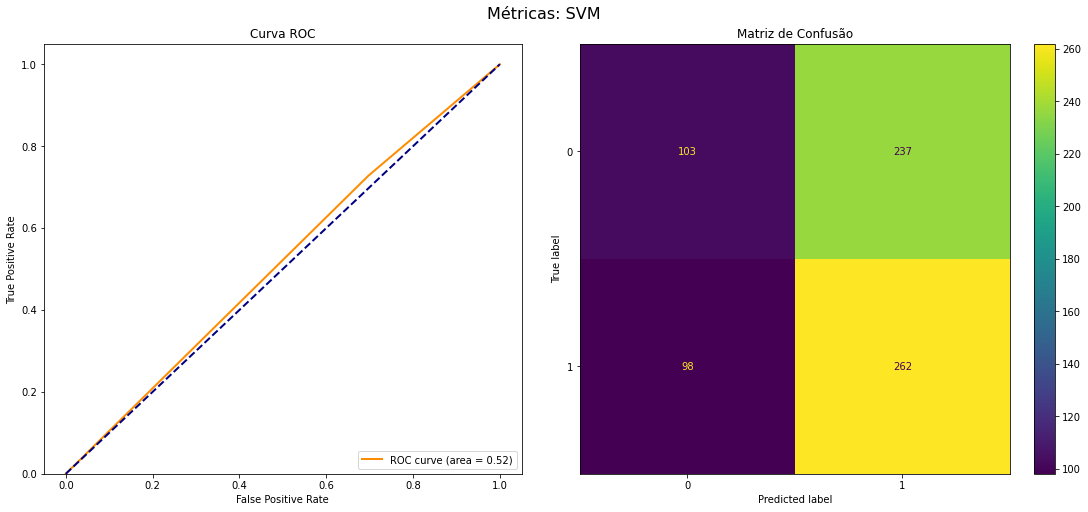

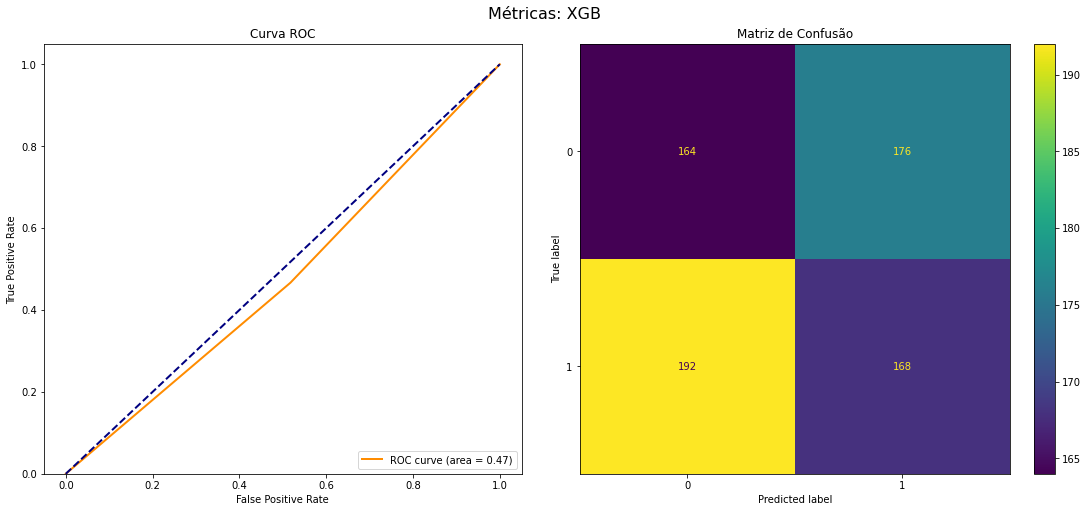

In [6]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
ext = '*.mat'
x_mat,y_mat = load_eeg_data_mat(directory, ext)
nb_classes = np.unique(y_mat).shape[0]
_, channels, samples = np.shape(x_mat)
run_pipeline(x_mat, y_mat, "BCICIV_I", "all", metrics_results, fs=100, binary=True)

### 2. Training the subjects' data separately

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190549)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190473)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\plots.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,7))
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190329)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190608)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of EEG: (59, 190602)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'right']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  warnings.warn('nperseg = {0:d} is greater than input length '


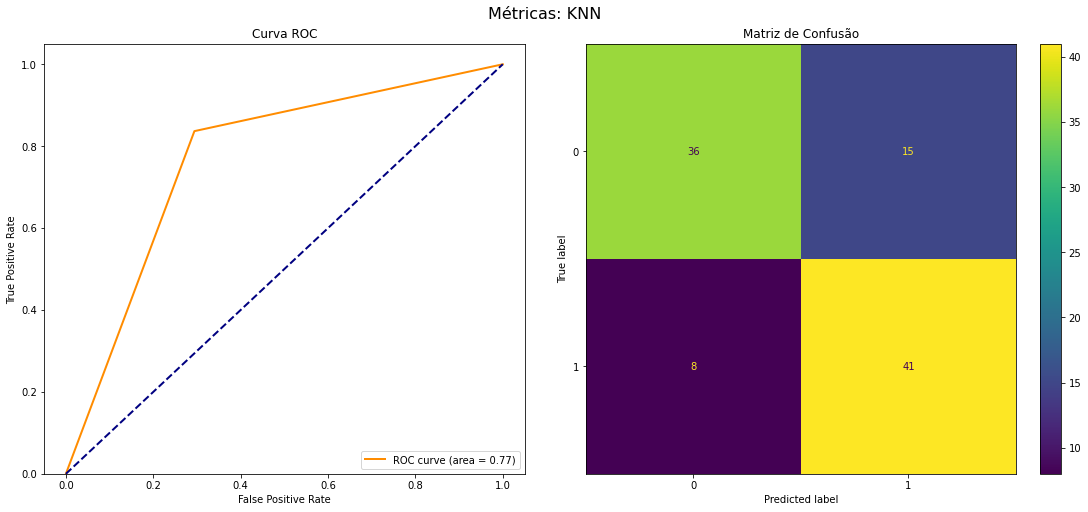

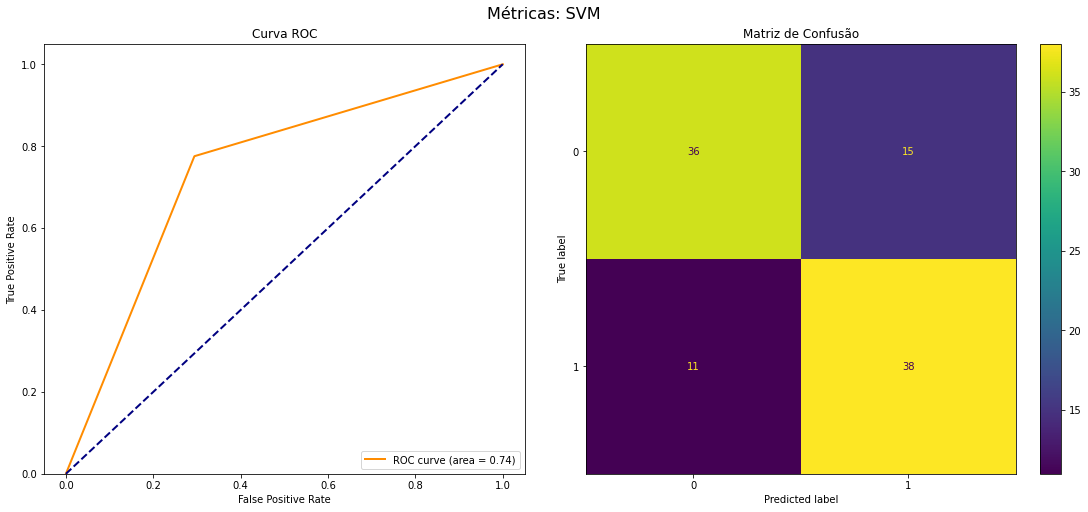

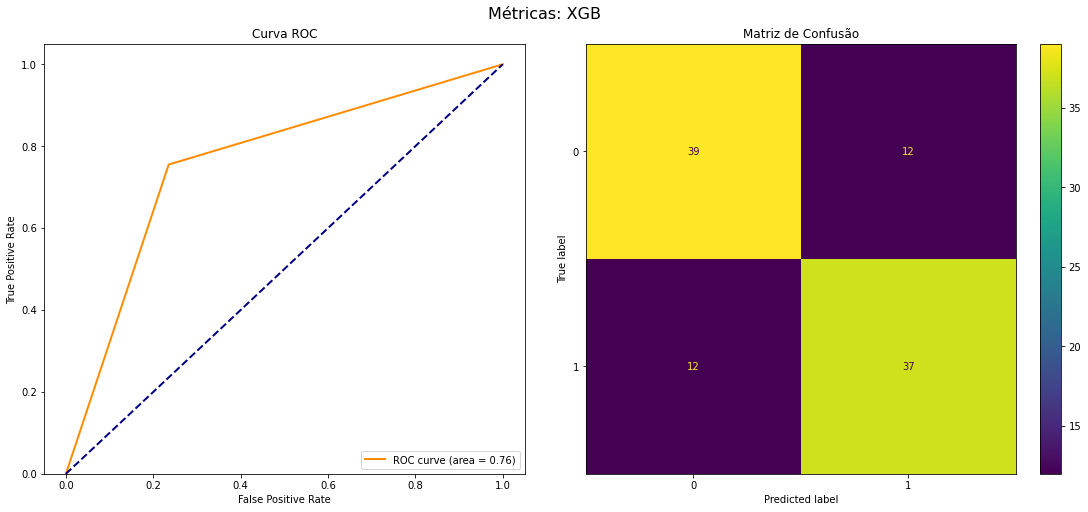

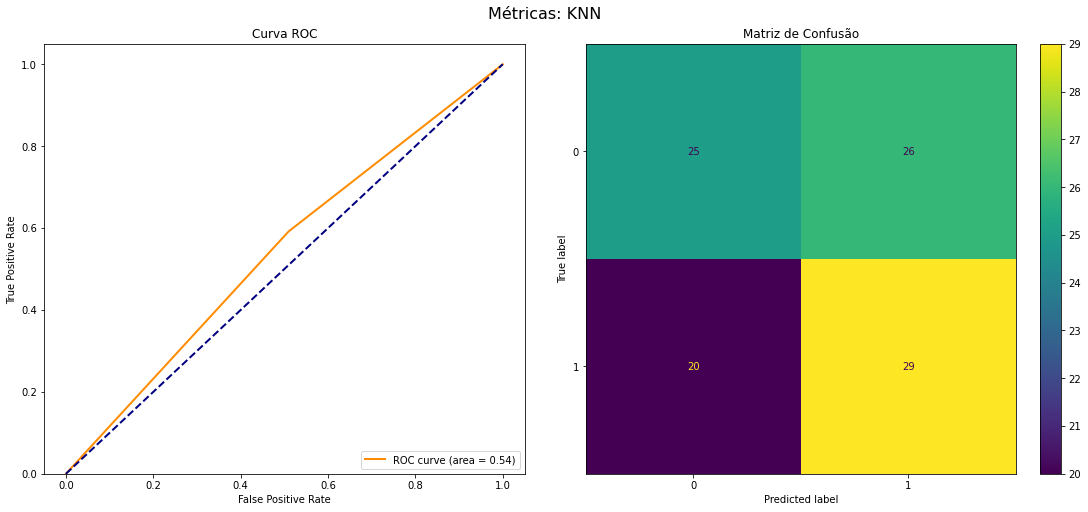

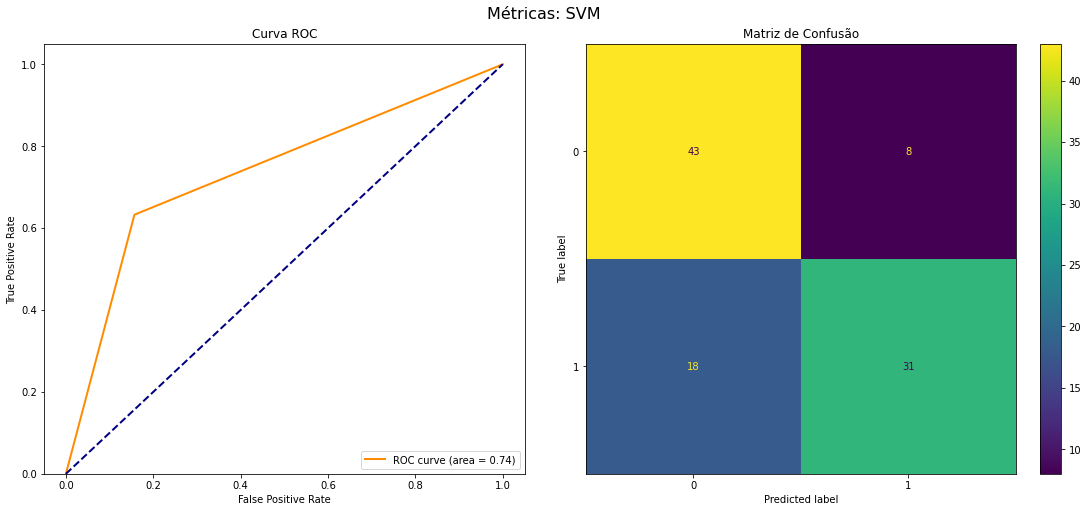

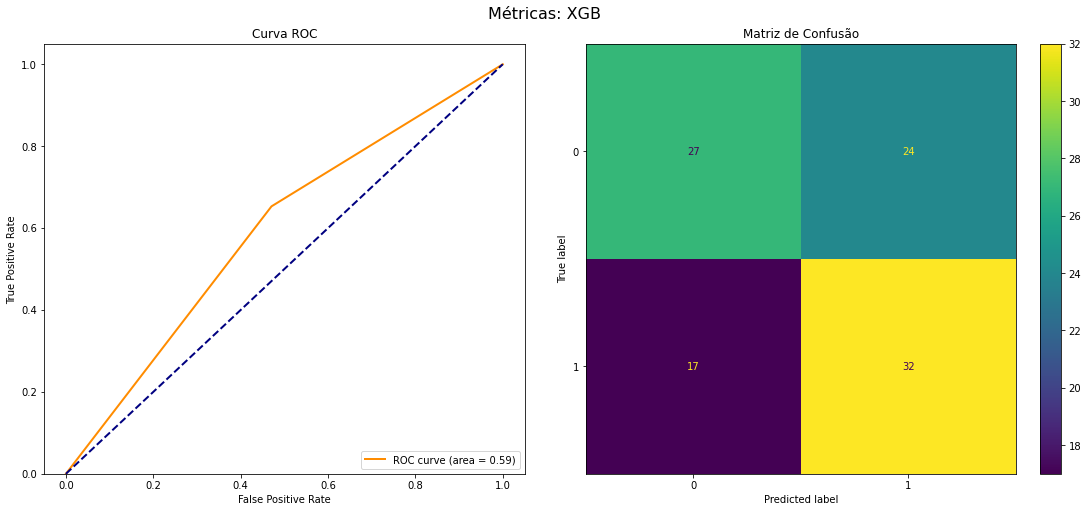

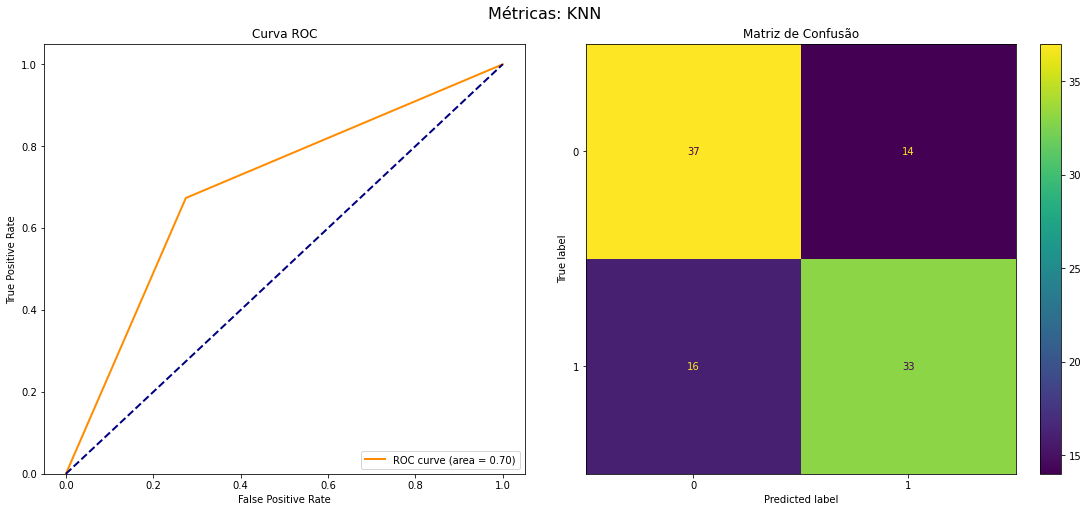

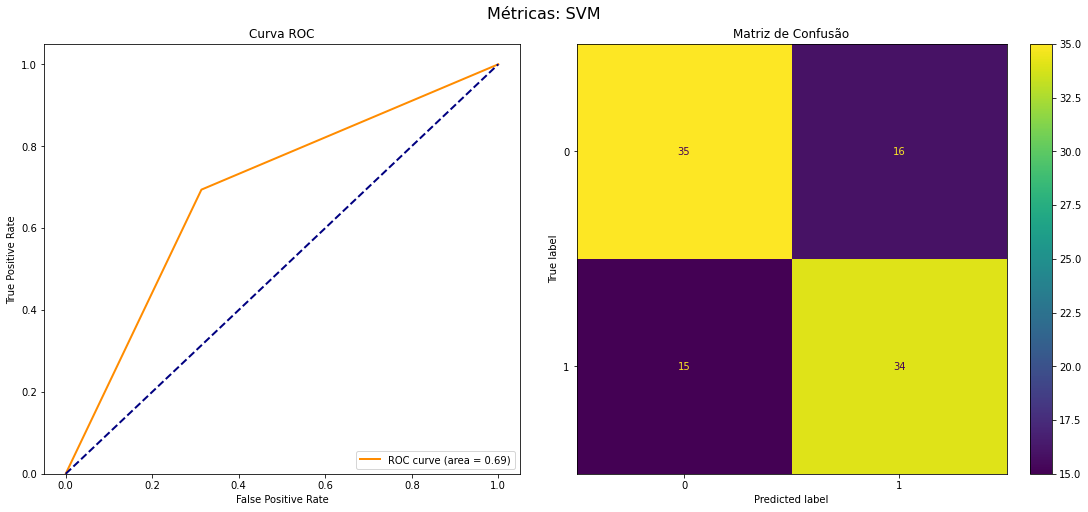

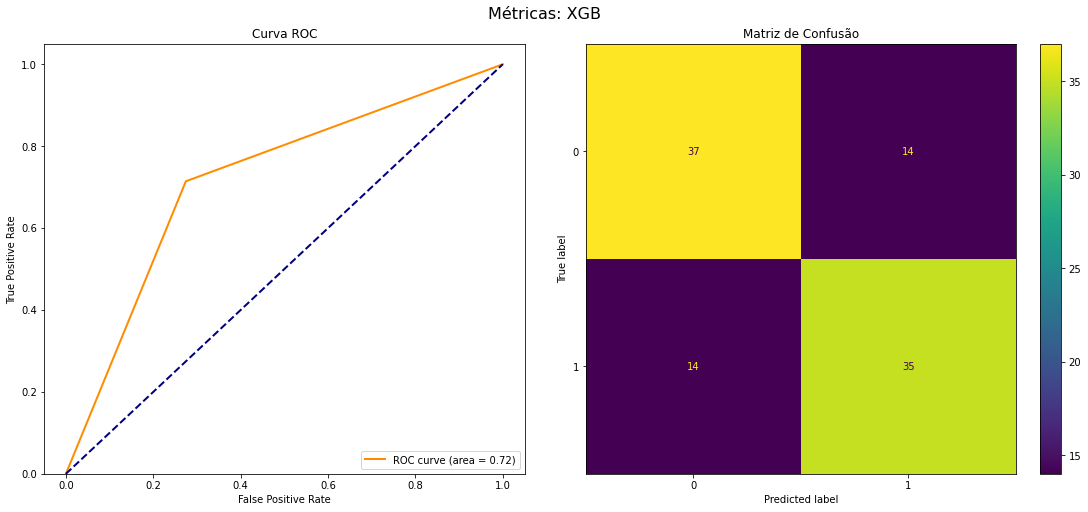

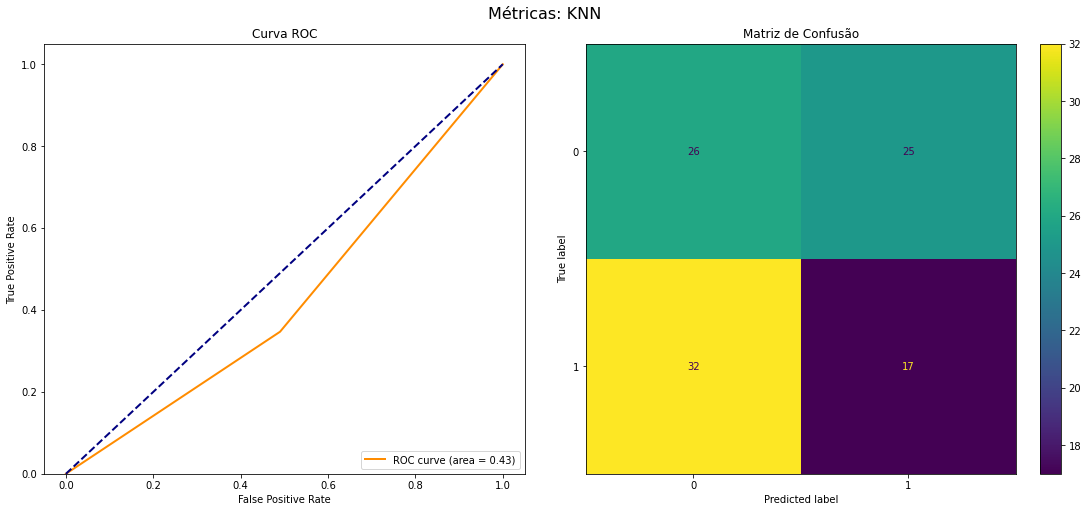

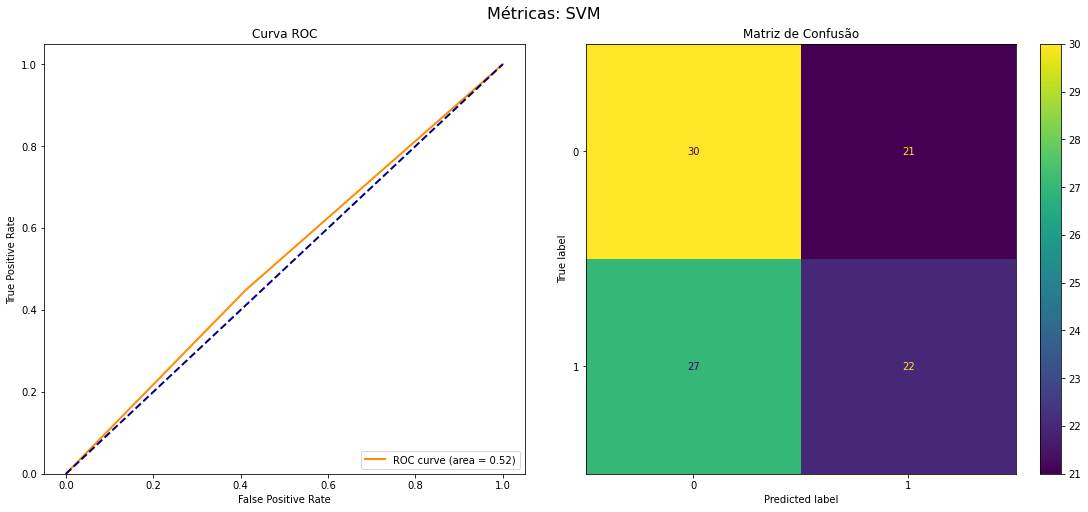

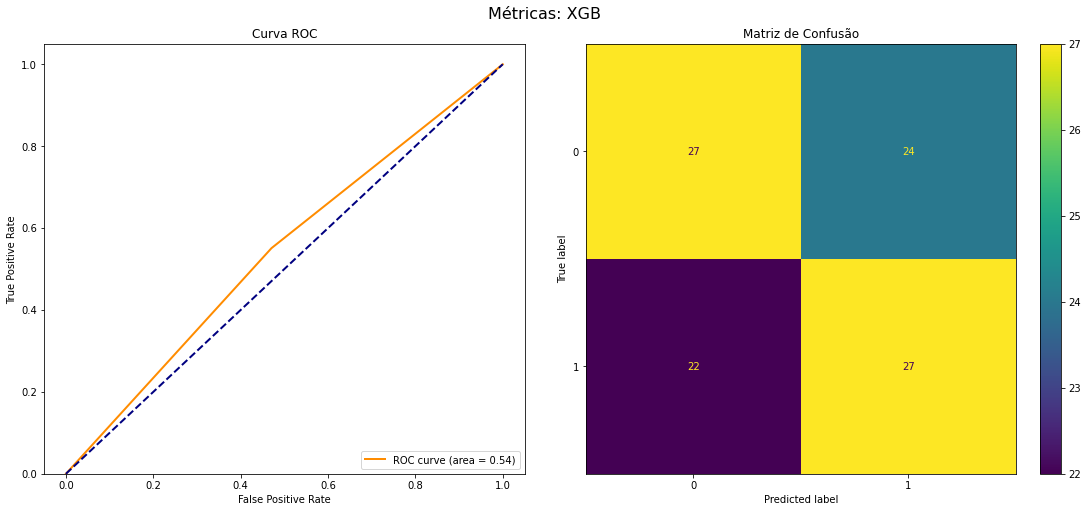

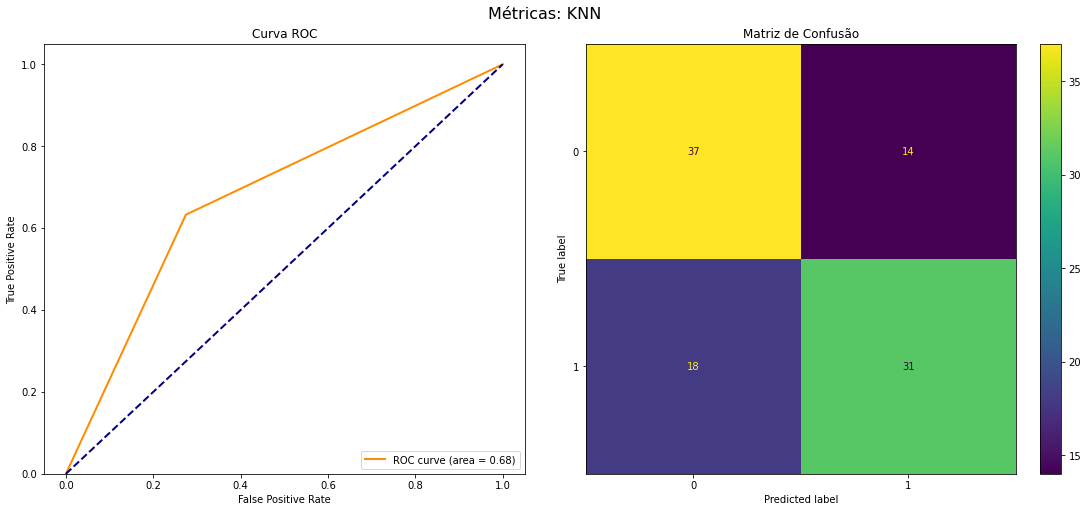

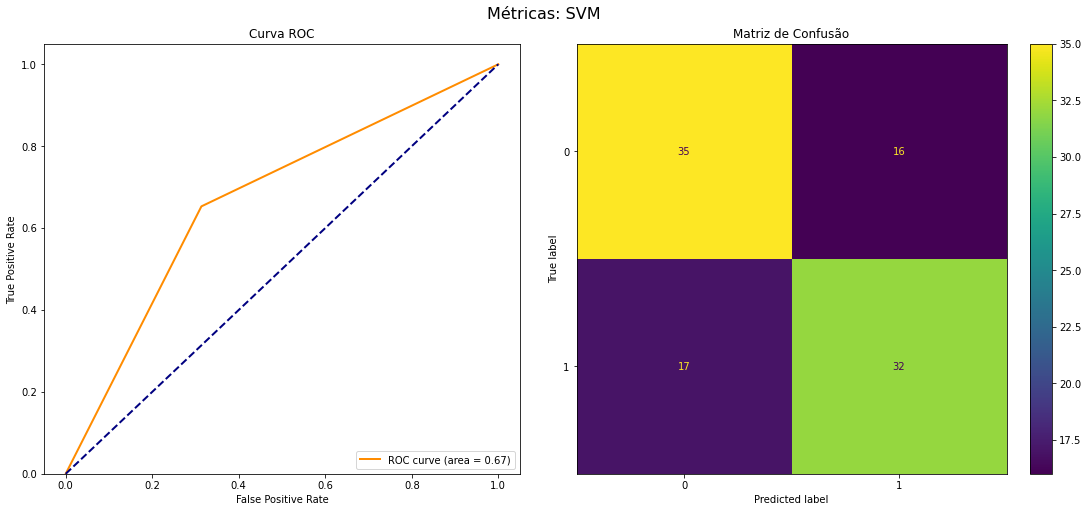

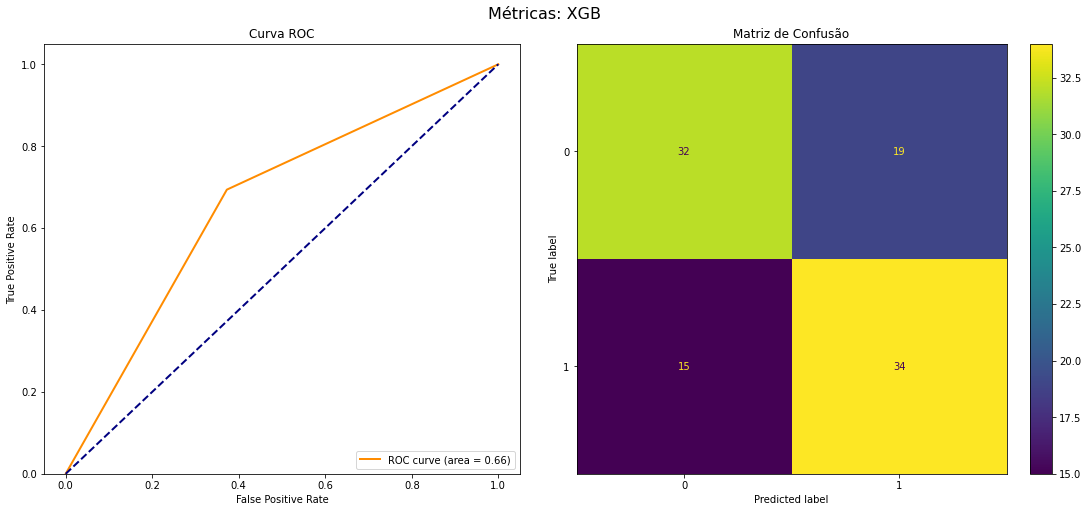

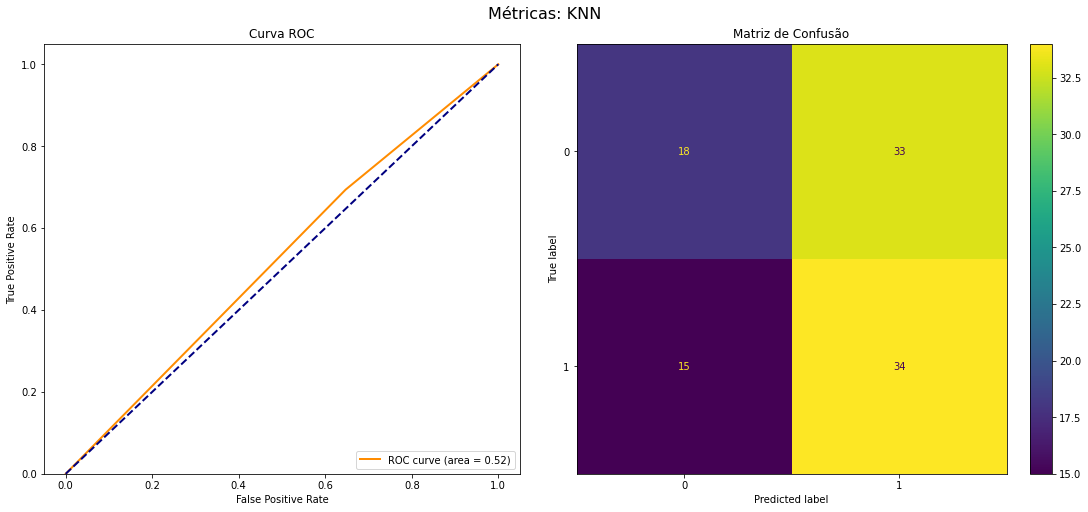

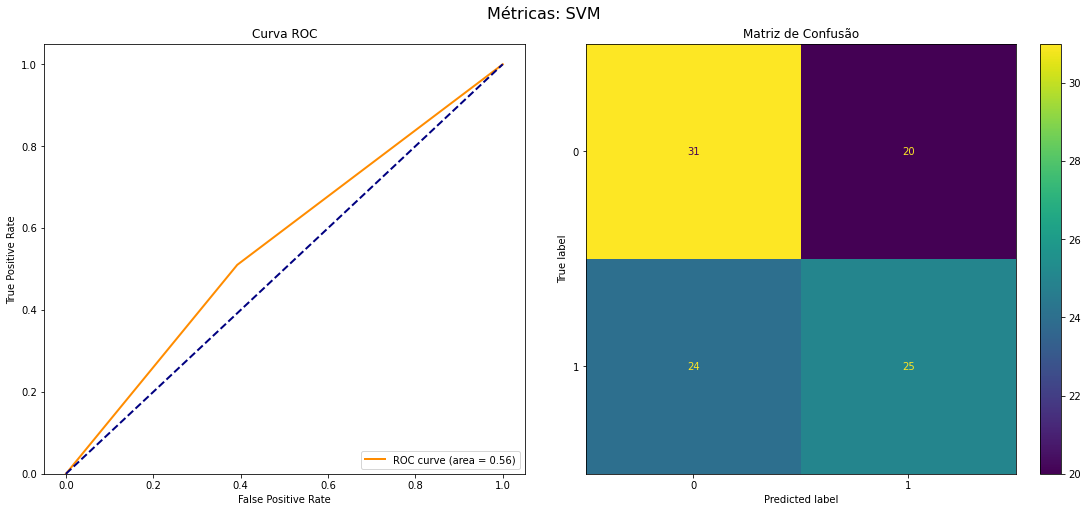

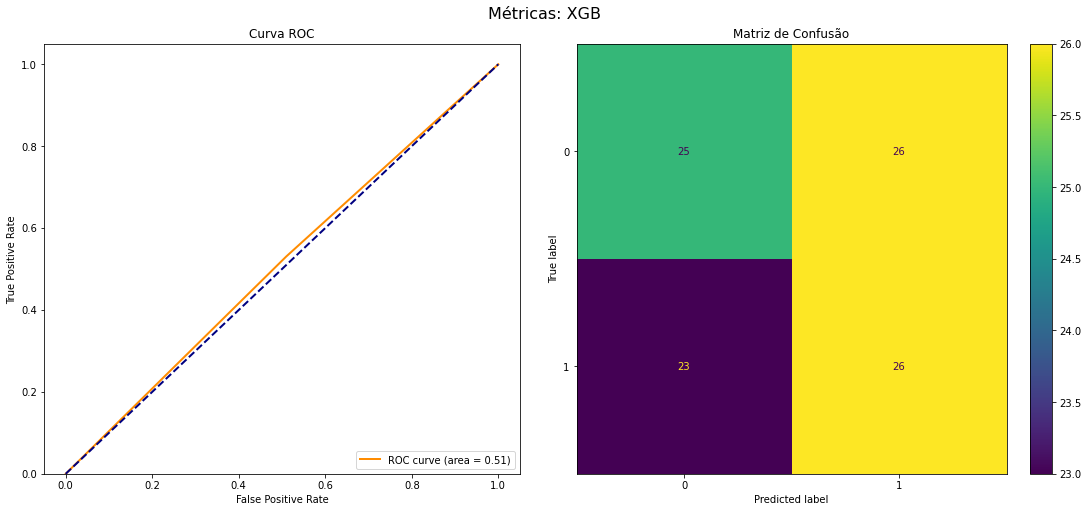

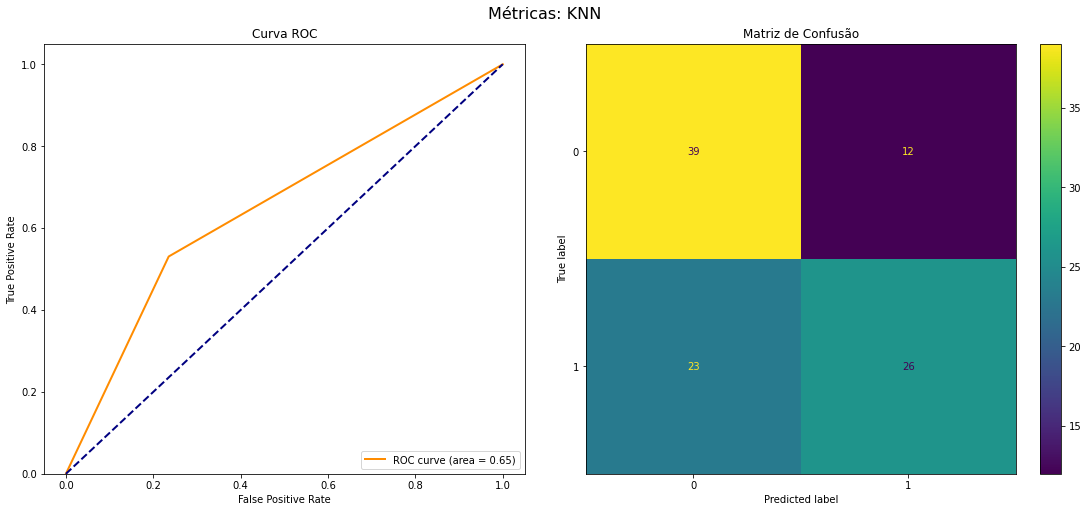

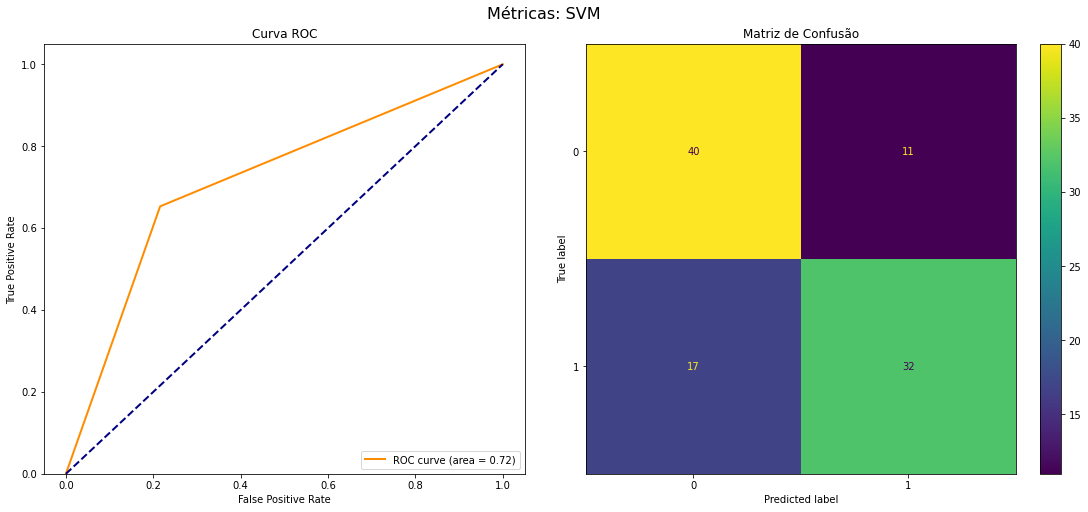

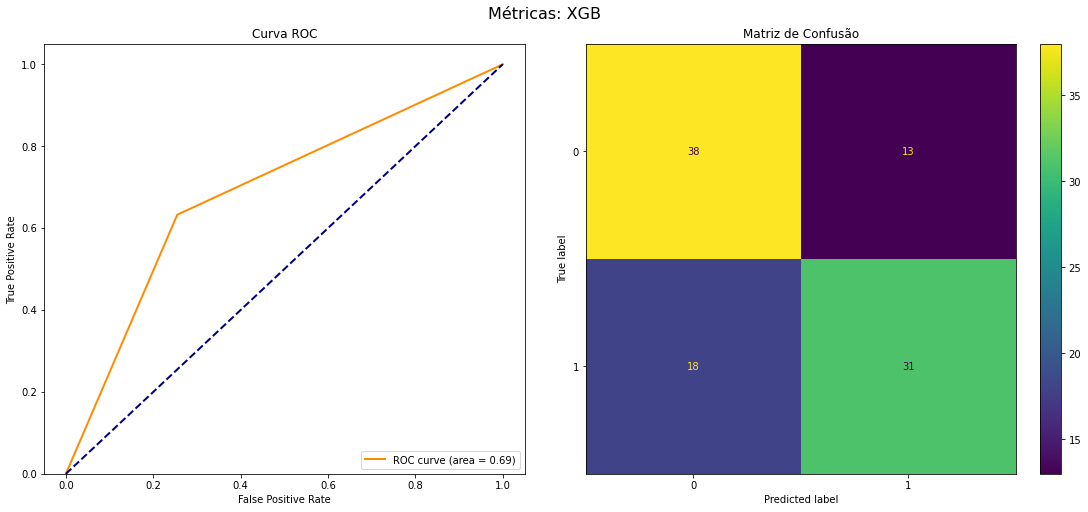

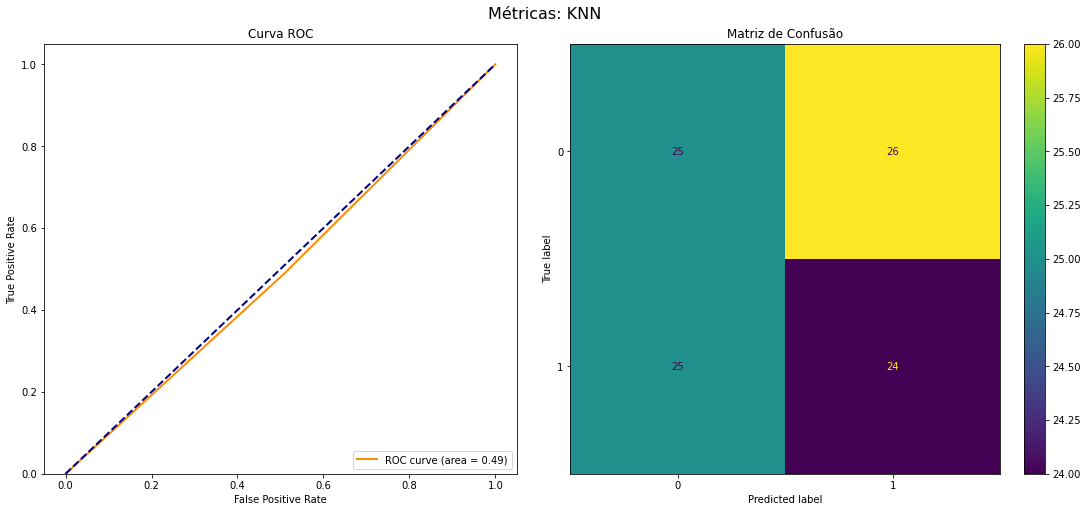

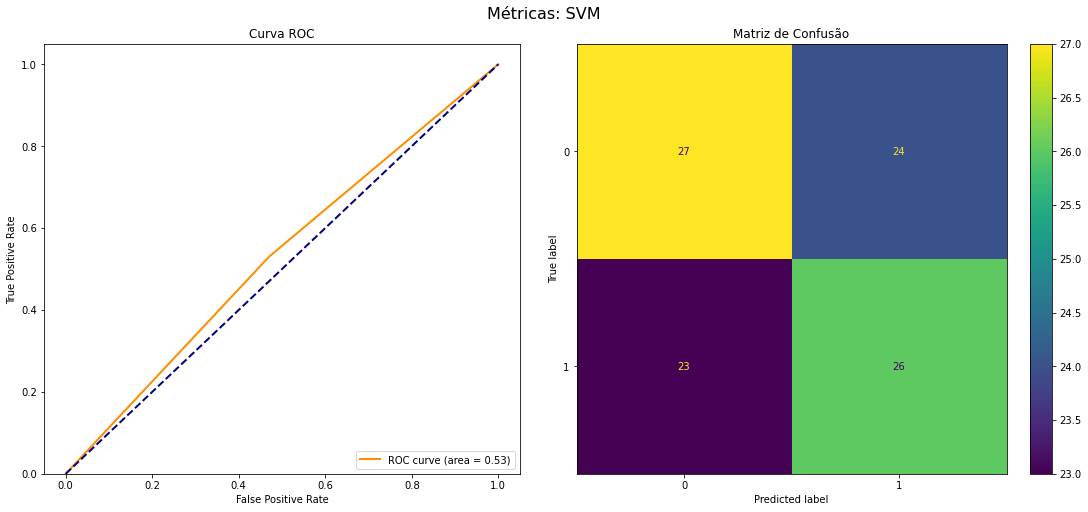

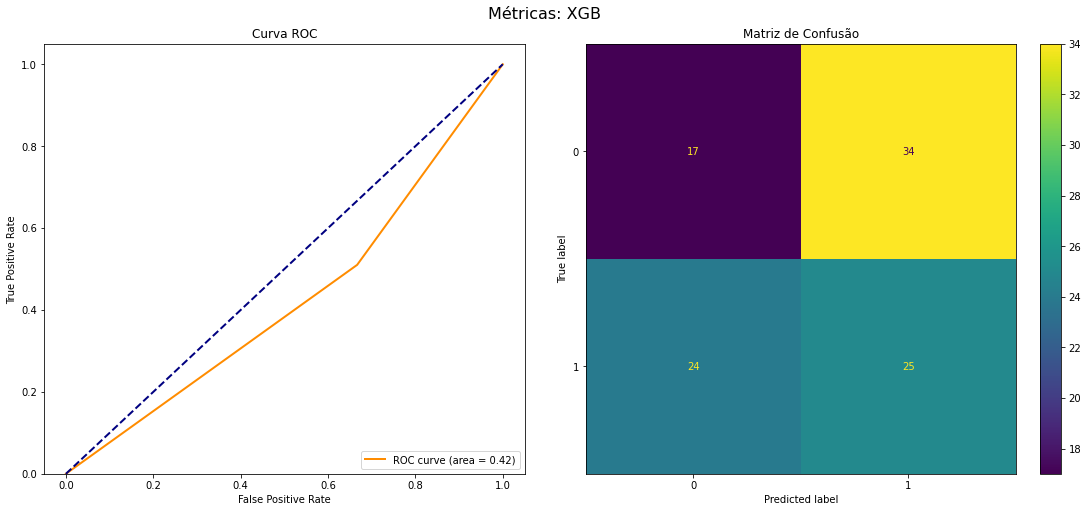

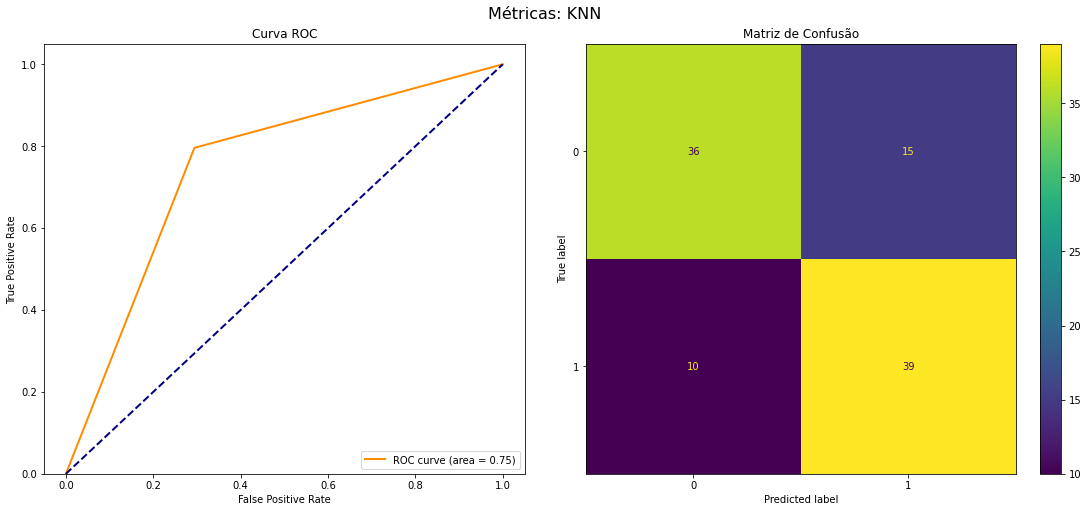

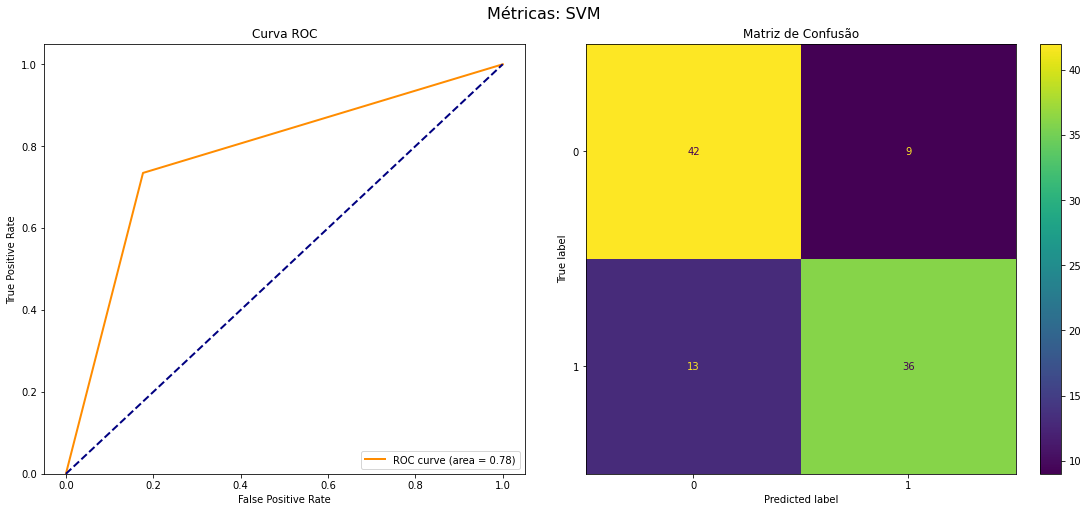

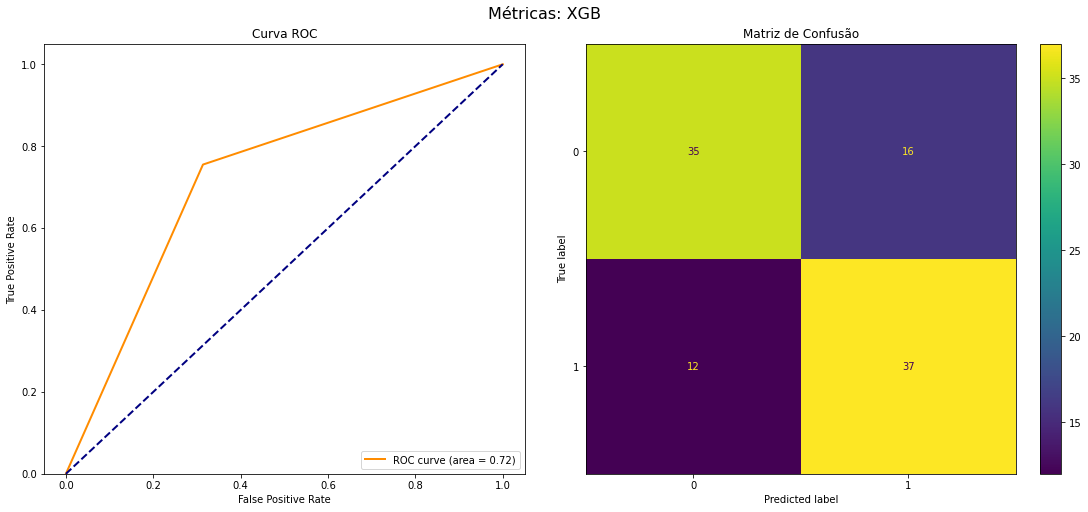

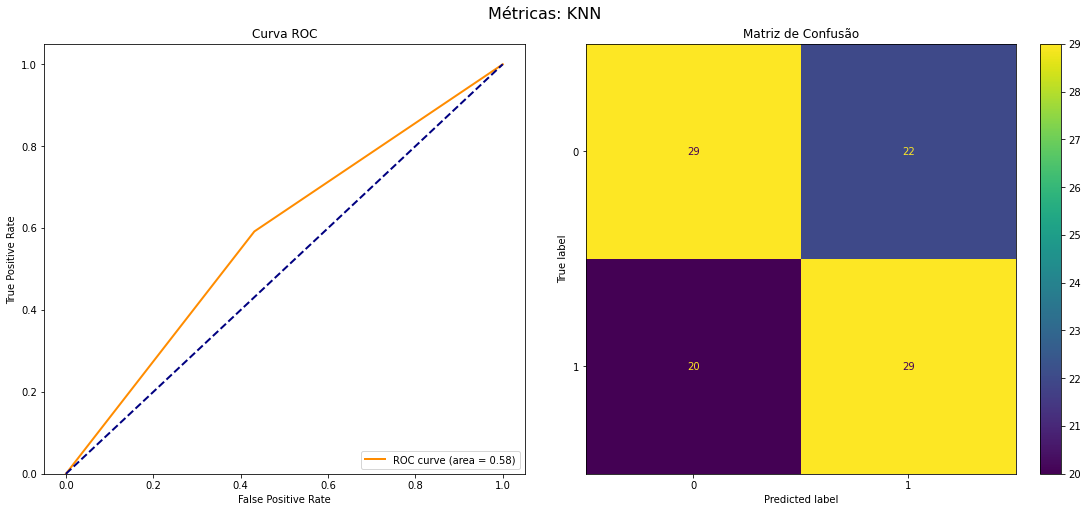

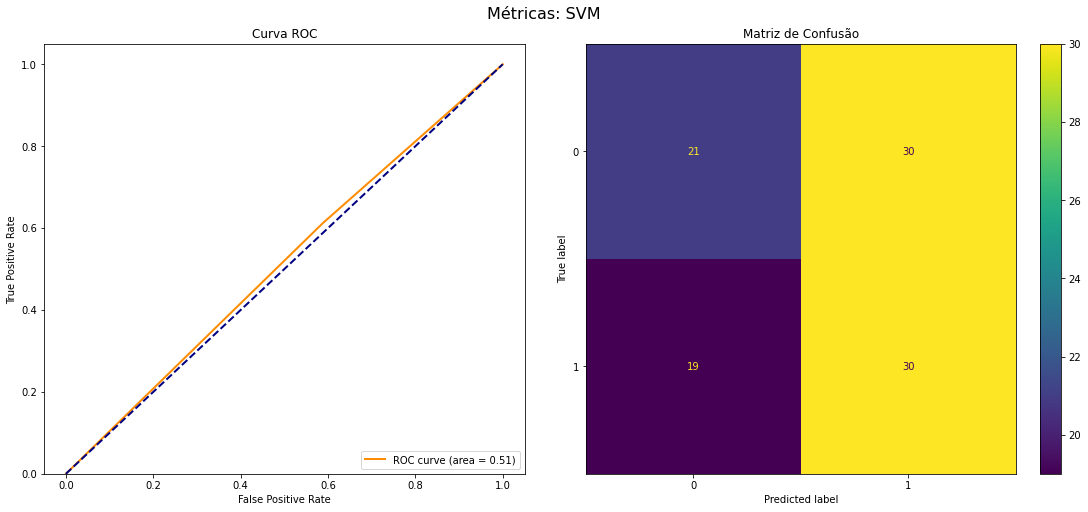

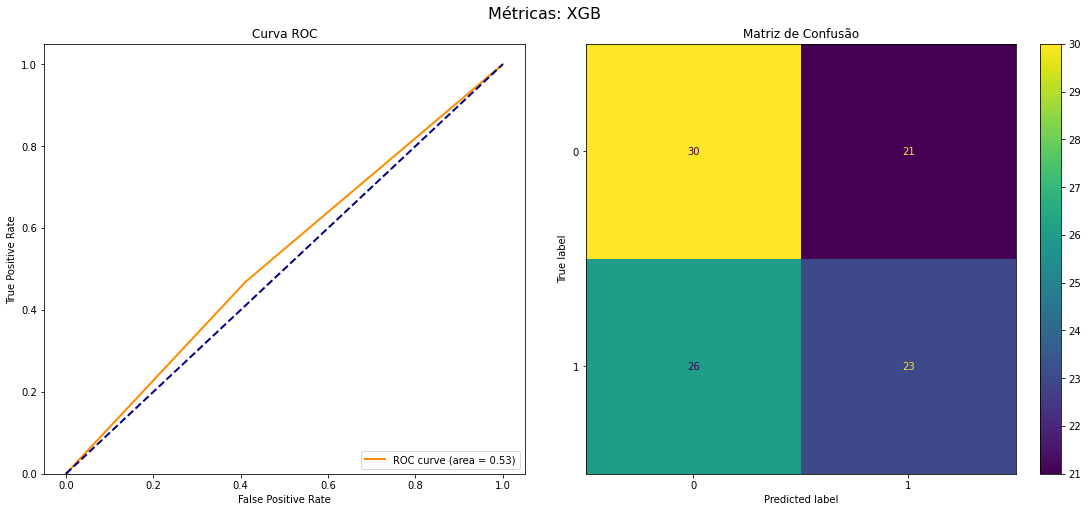

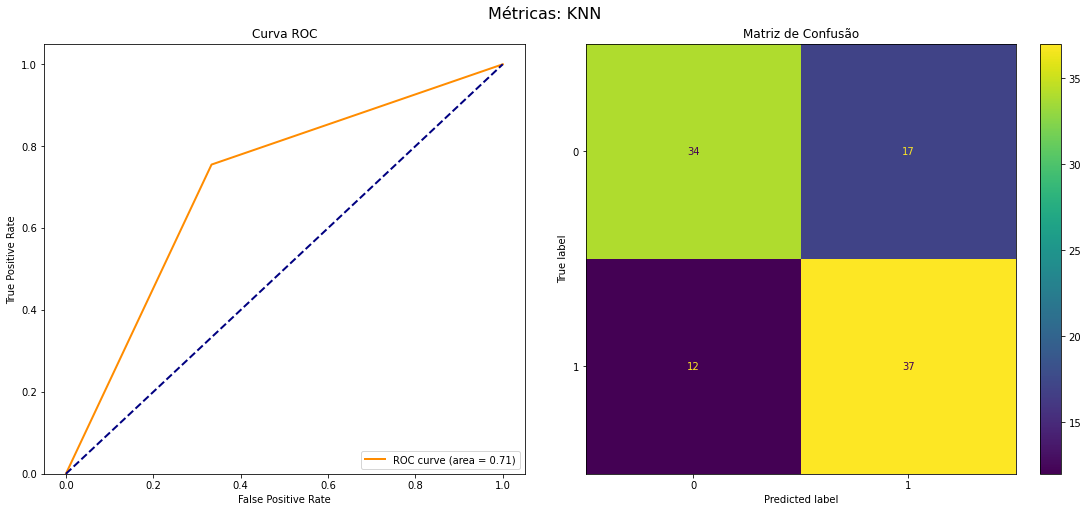

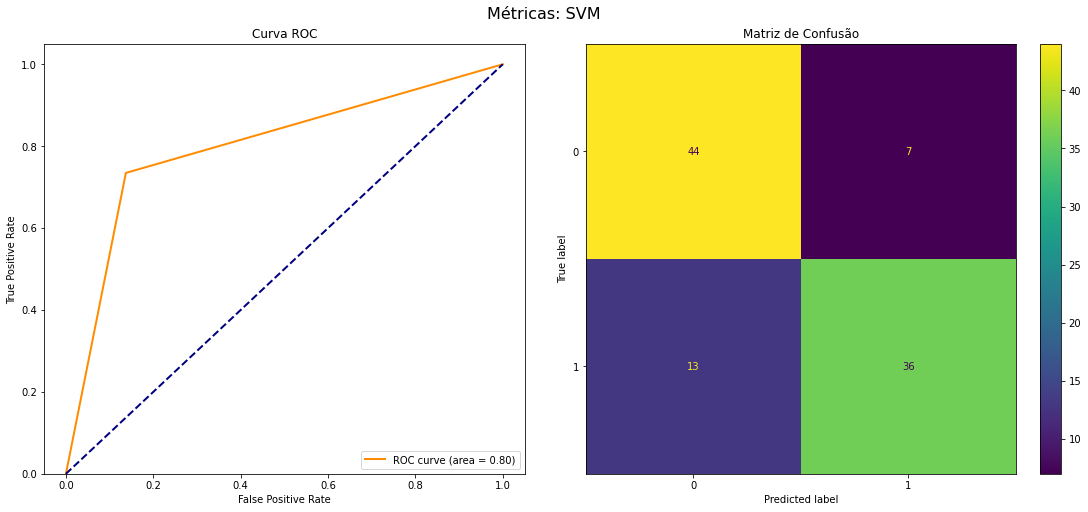

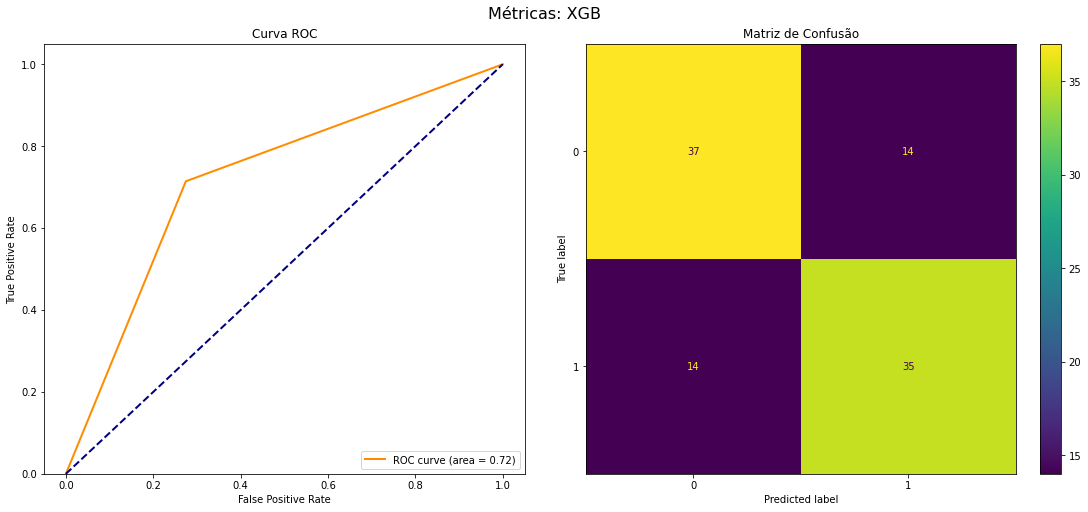

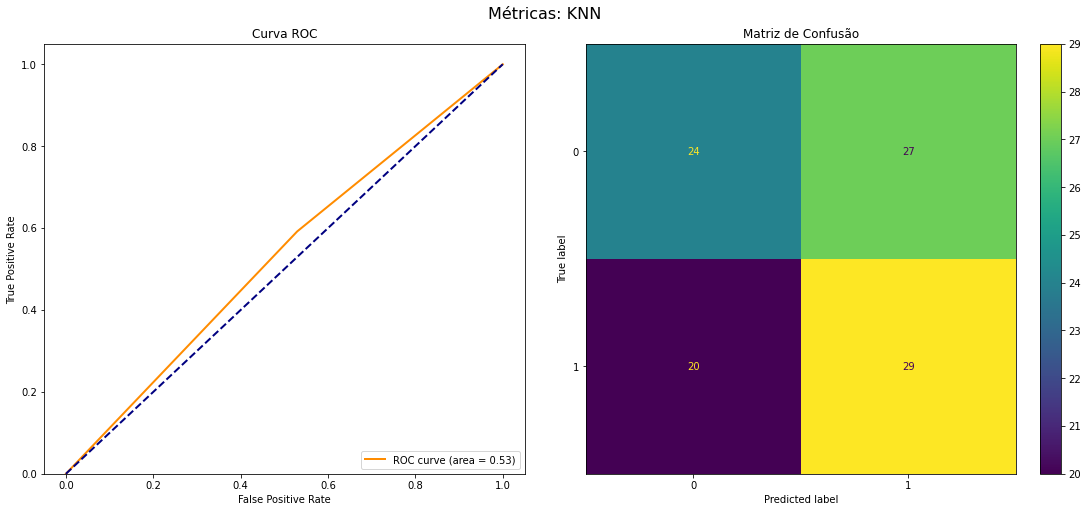

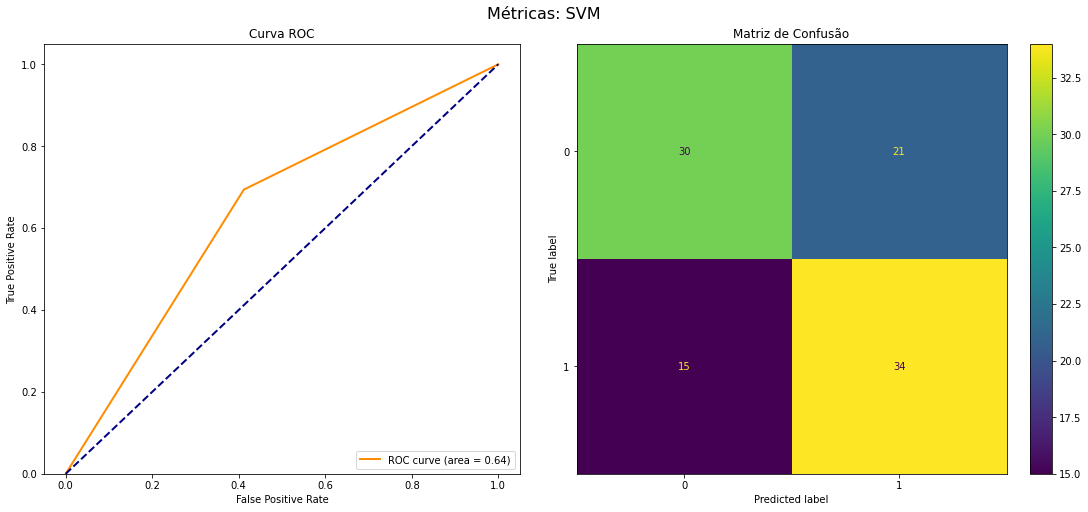

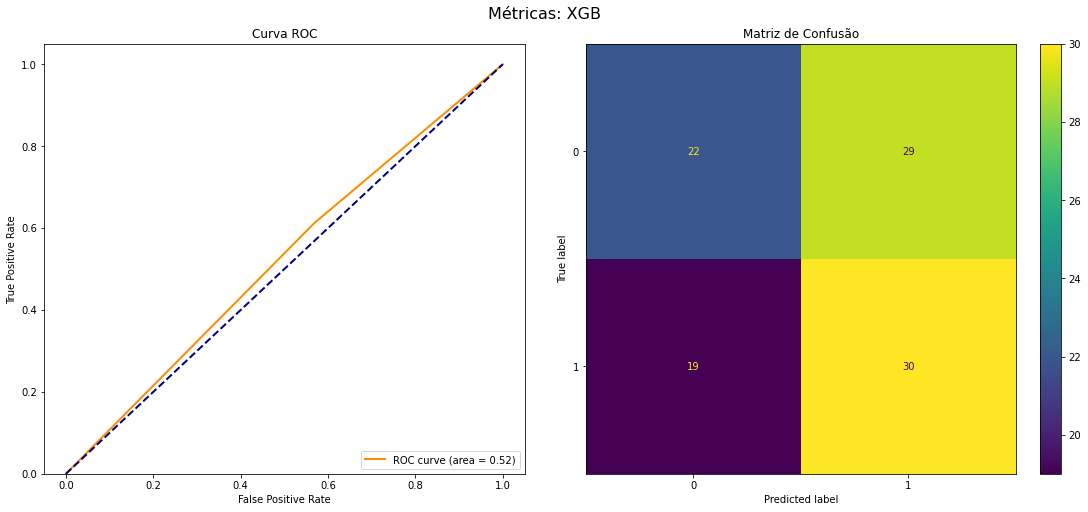

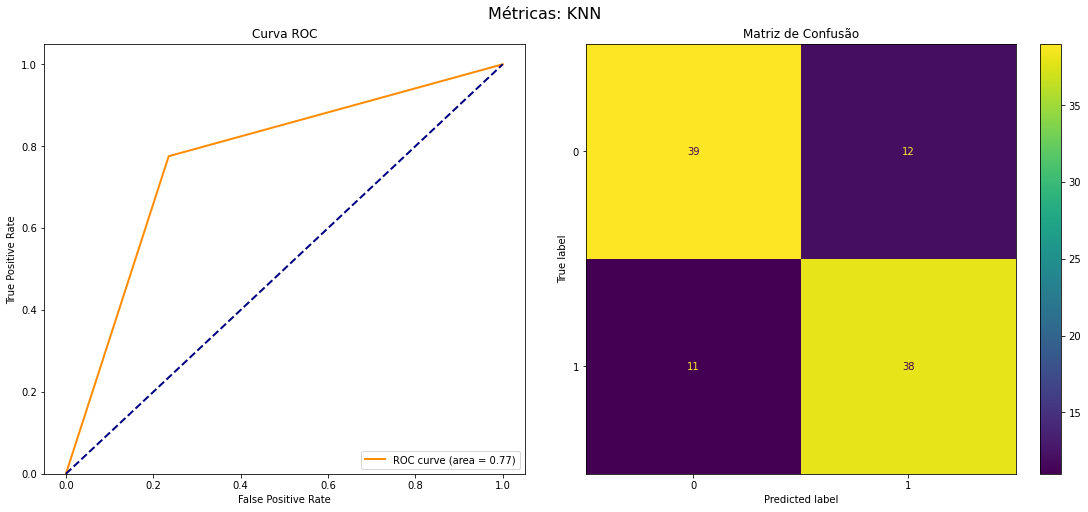

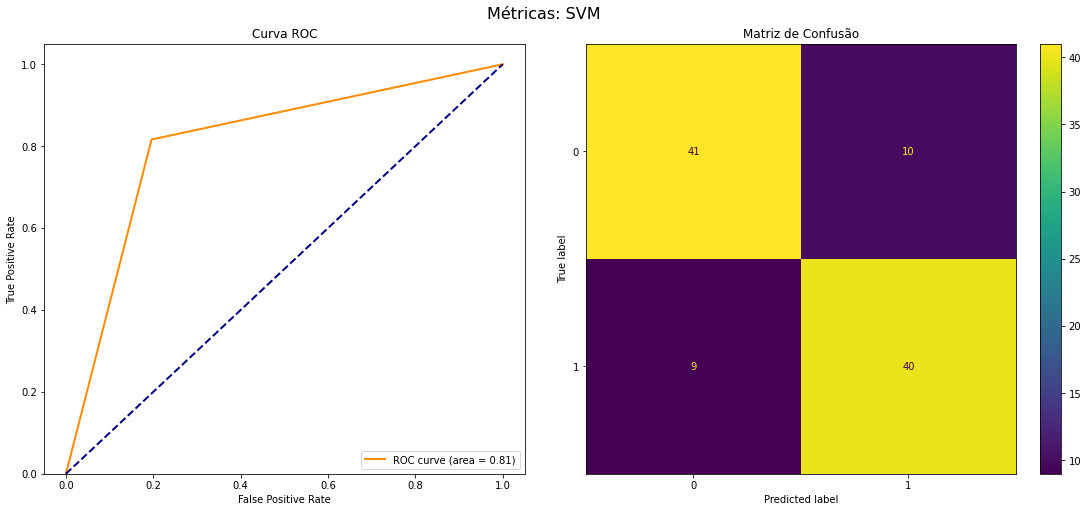

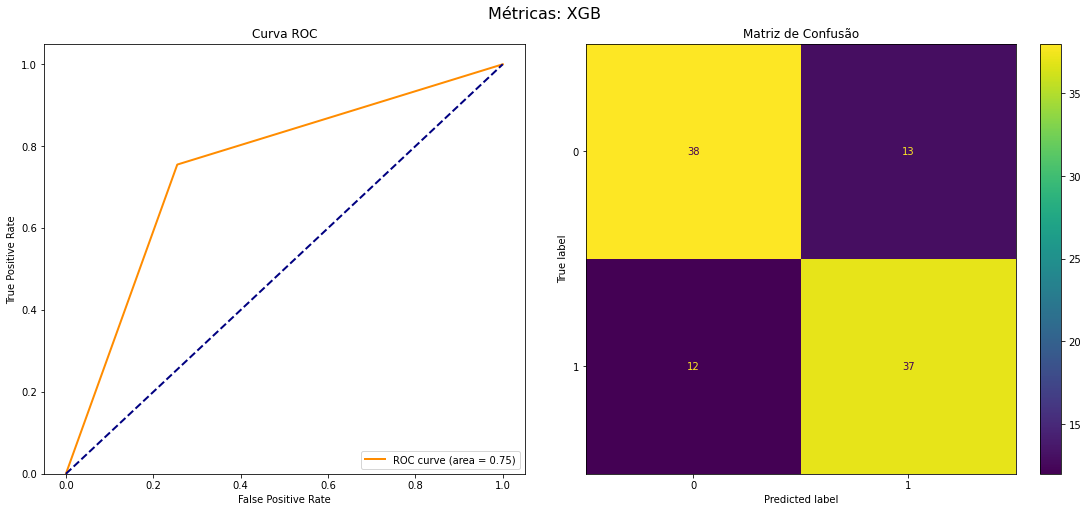

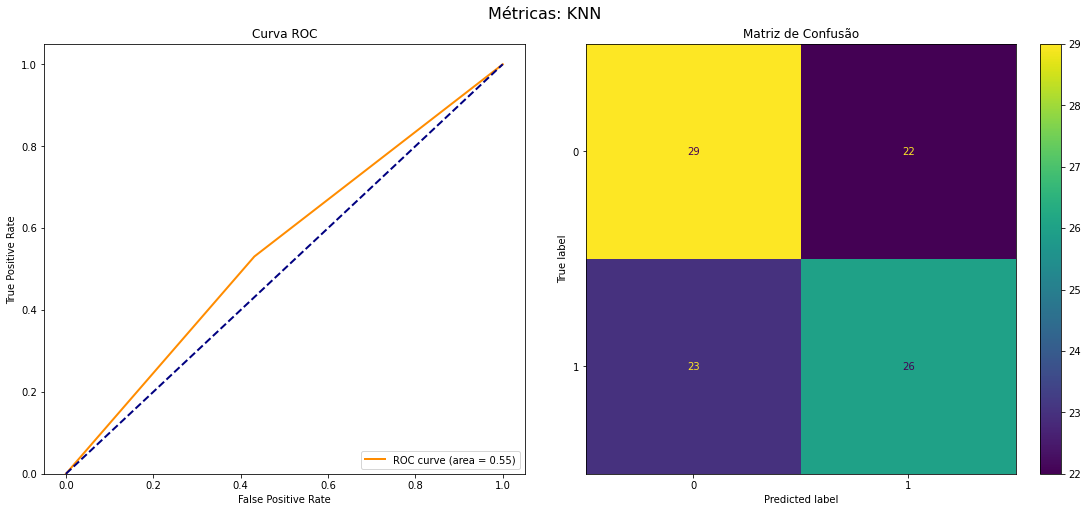

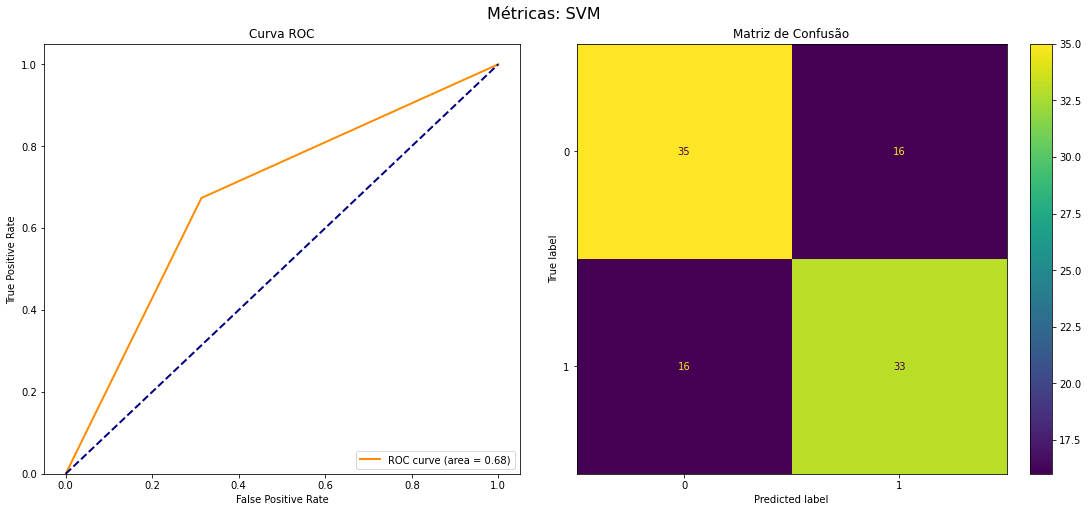

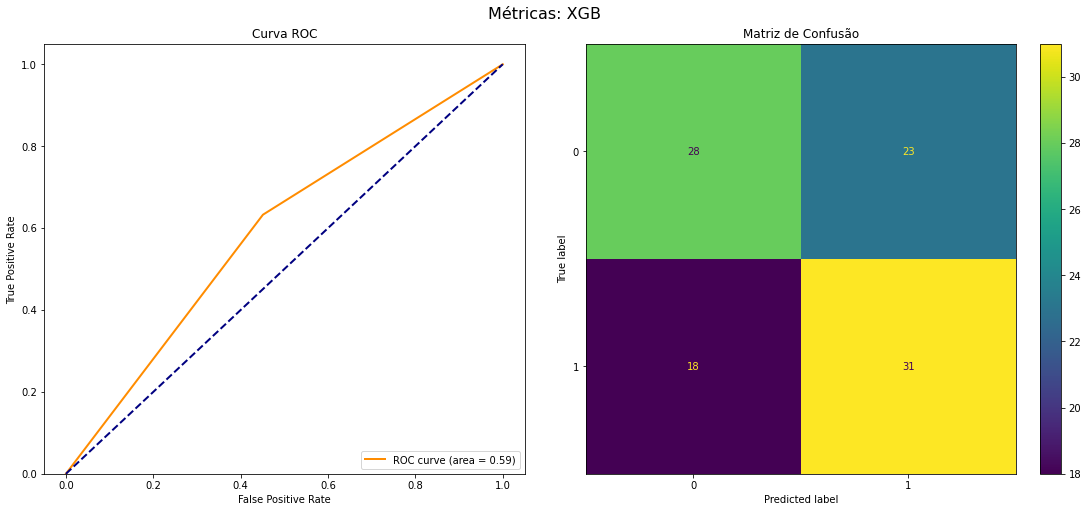

In [7]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
files = [ file.stem for file in Path(directory).glob('*.mat')]
for file in files:
    extension = file + '.mat'
    x_mat,y_mat = load_eeg_data_mat(directory, extension)
    if  np.shape(x_mat)[0] == 0:
        continue
    
    nb_classes = np.unique(y_mat).shape[0]
    _, channels, samples = np.shape(x_mat)
    run_pipeline(x_mat, y_mat, "BCICIV_I", file, metrics_results, fs=100, binary=True)

## Dataset B

### 1. Training all subjects' data at once

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 201 original time poin

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


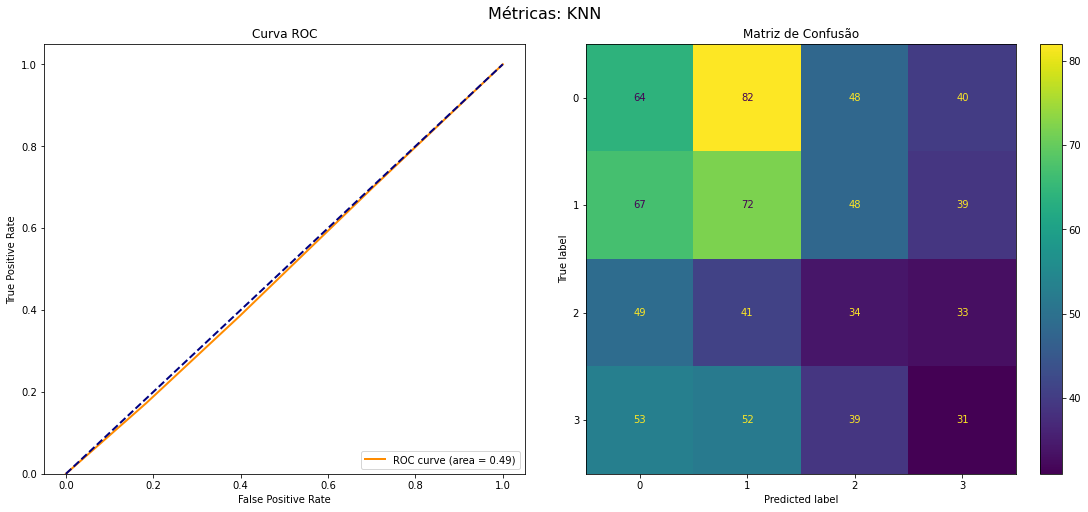

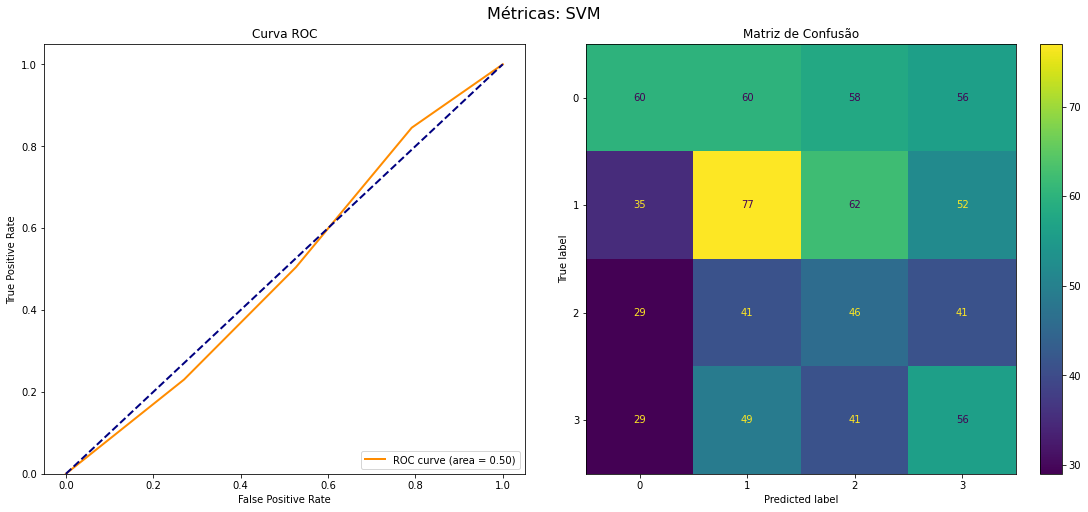

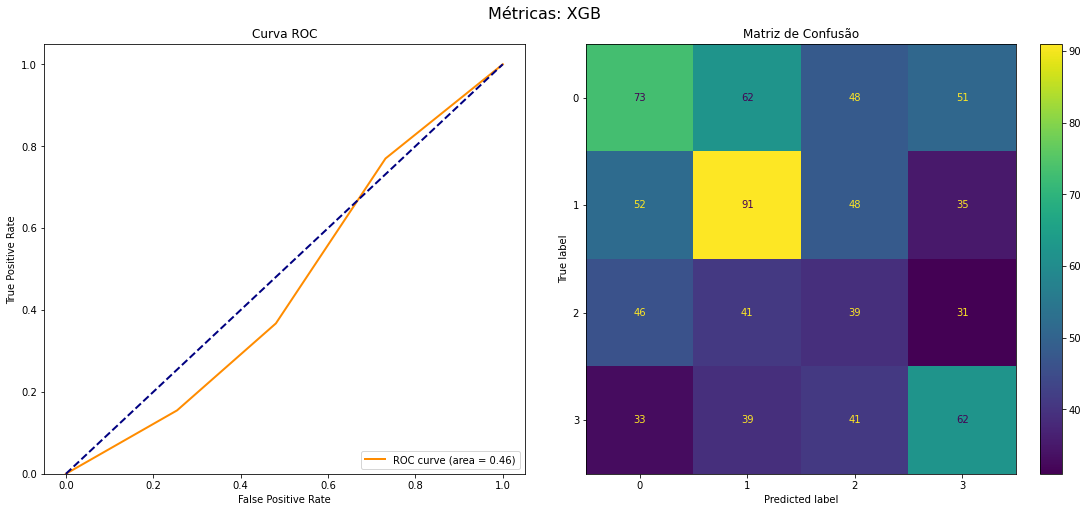

In [10]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_2a_gdf-dataset/' 
extension = '*T.gdf'


x_train_BCICIV, y_train_BCICIV = load_eeg_data_gdf(directory, extension)
nb_classes = np.unique(y_train_BCICIV).shape[0]
run_pipeline(x_train_BCICIV, y_train_BCICIV, "BCICIV_II", 'all', metrics_results, fs=250, binary=False)

True

### 2. Training the subjects' data separately

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 144 events and 201 original time poin

c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 9 (event id 9)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\dataloader.py:28: RuntimeWarning: No matching events found for 10 (event id 10)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8,9,10],on_missing ='warn',tmin= -0.1, tmax=0.7, preload=True)
c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\BCICIV_2a_gdf-dataset\A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\mne\io\edf\edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Maods\.pyenv\pyenv-win\versions\3.9.12\lib\contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 orig

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


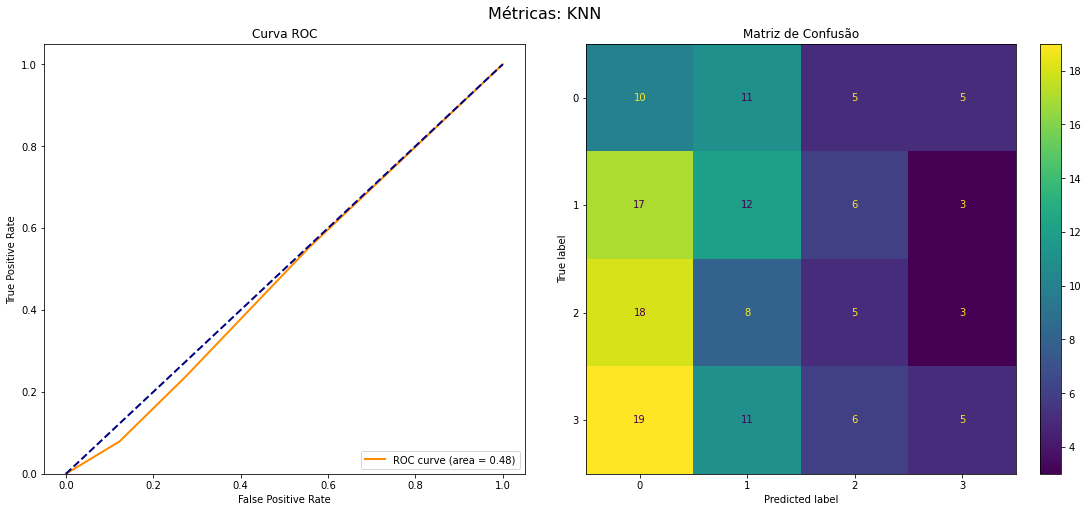

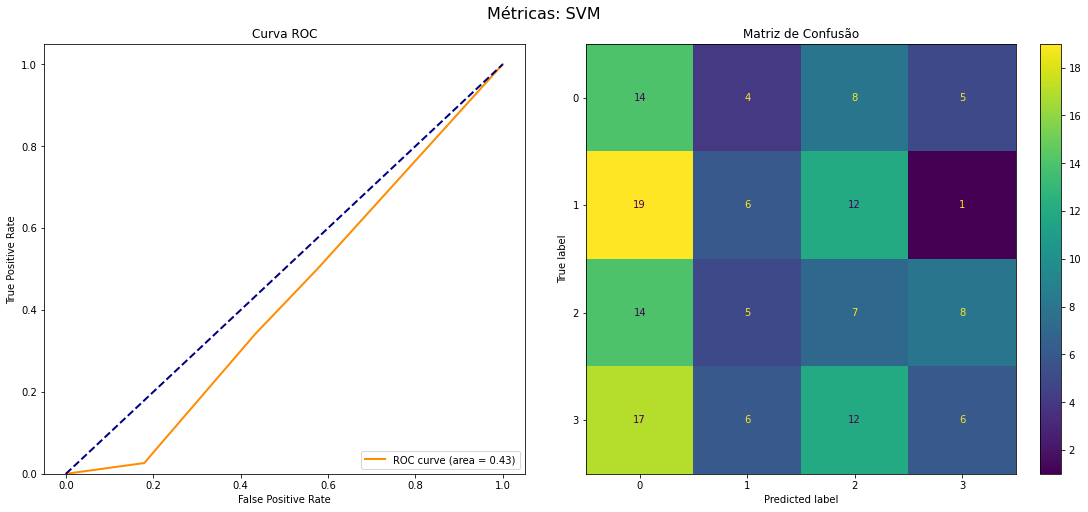

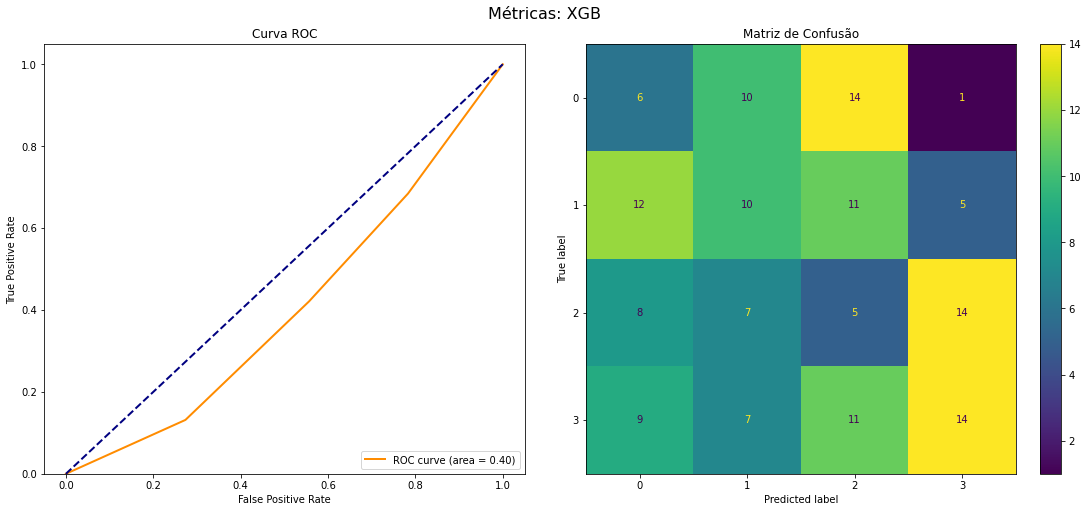

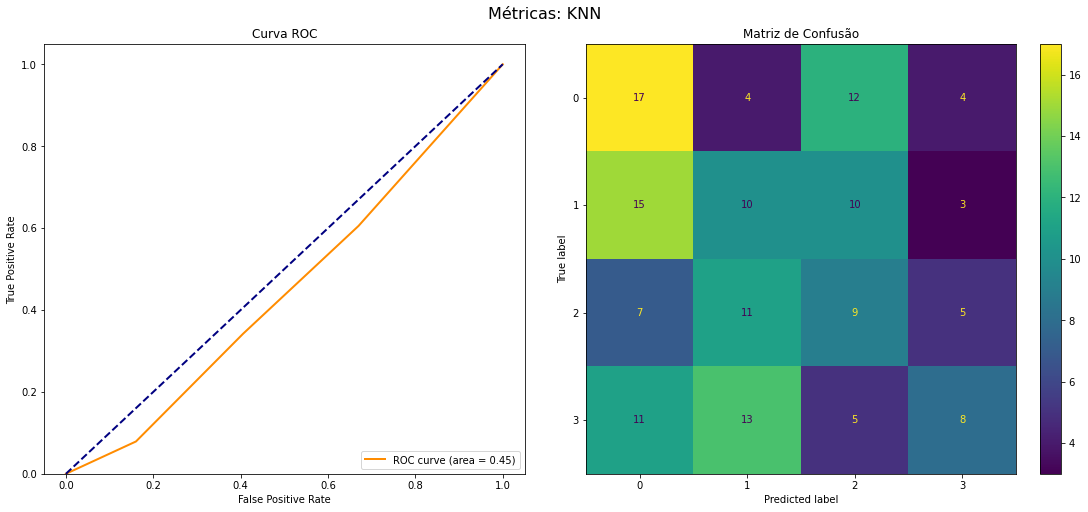

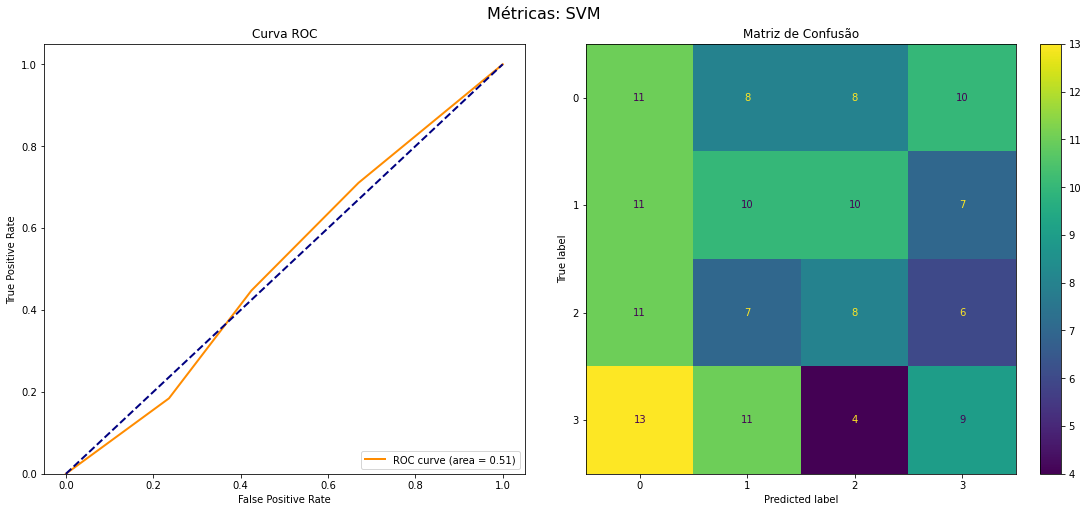

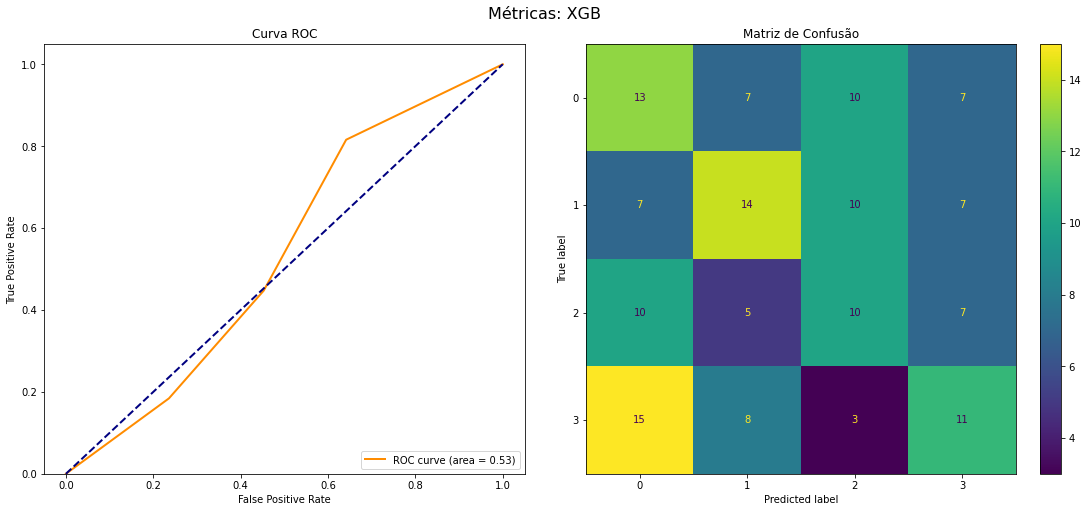

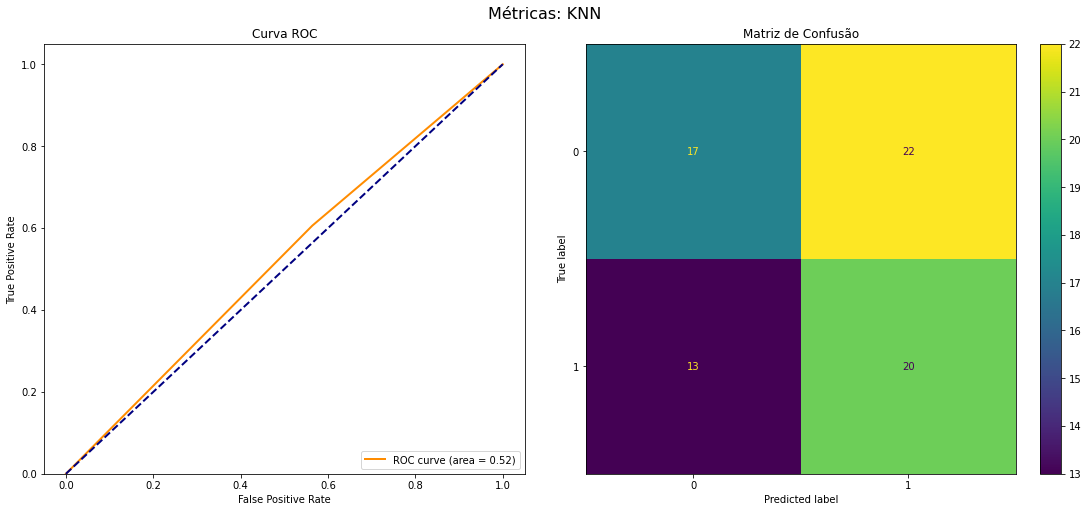

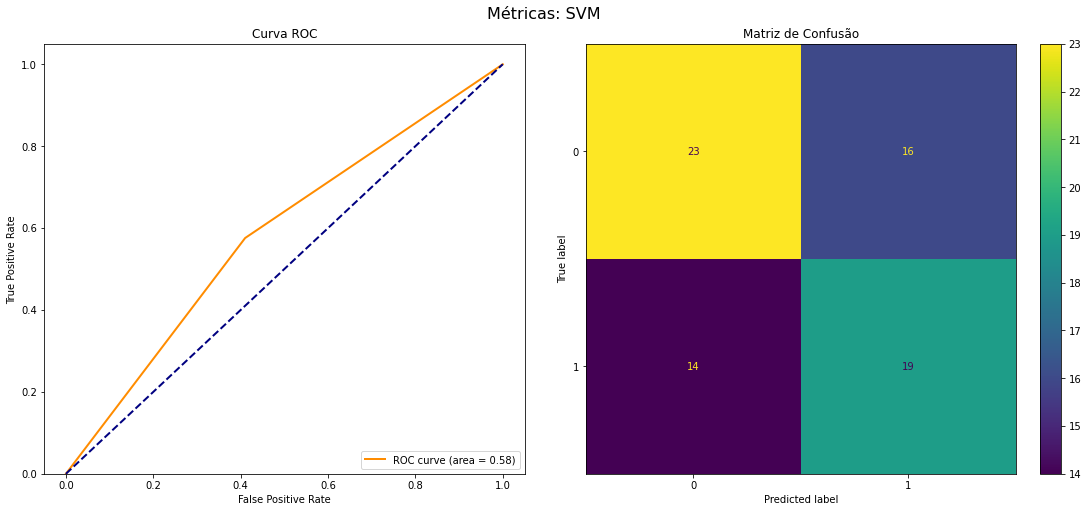

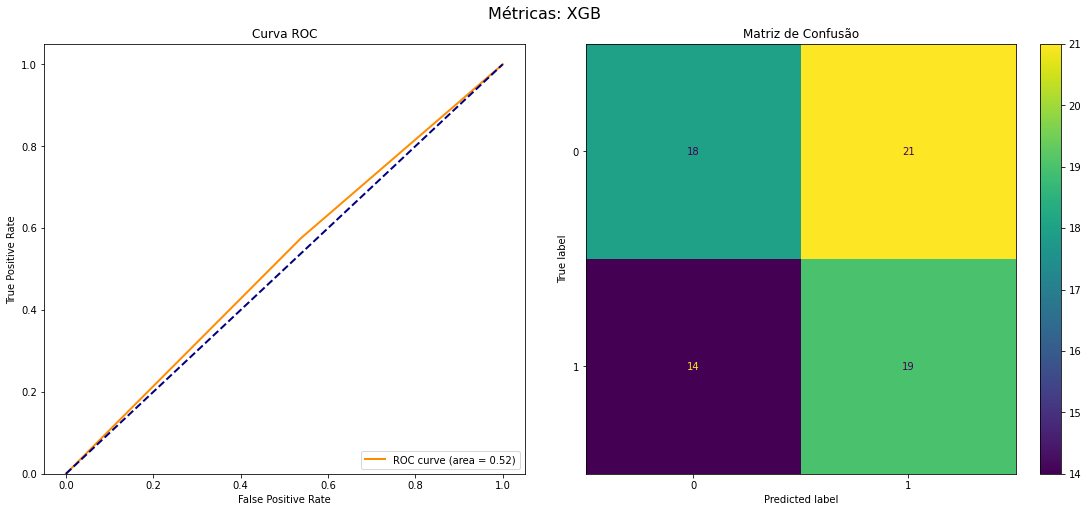

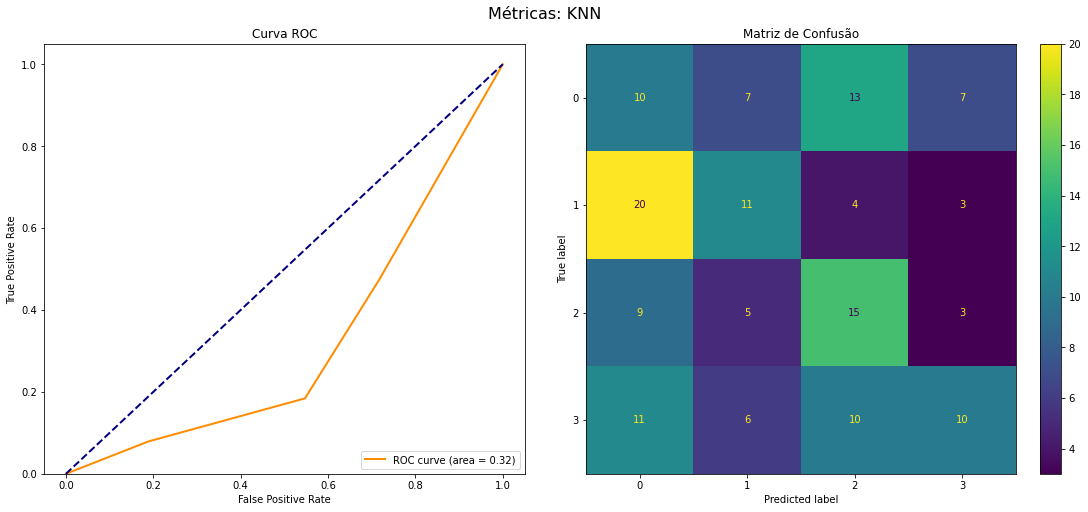

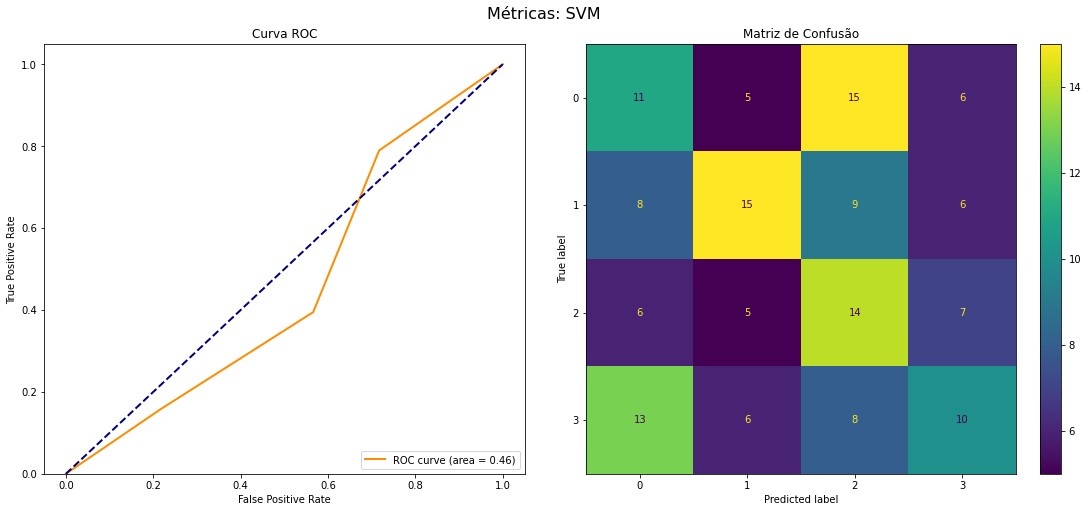

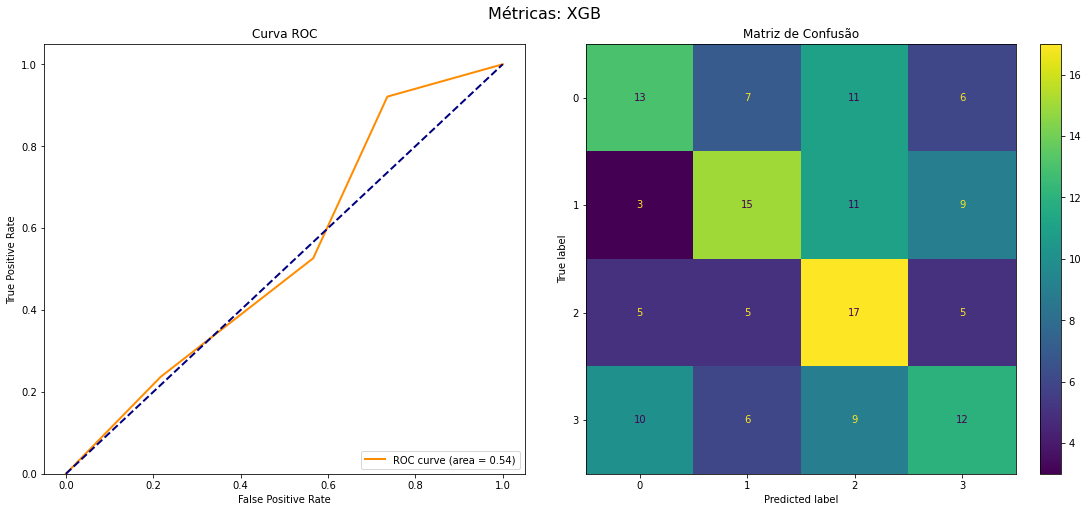

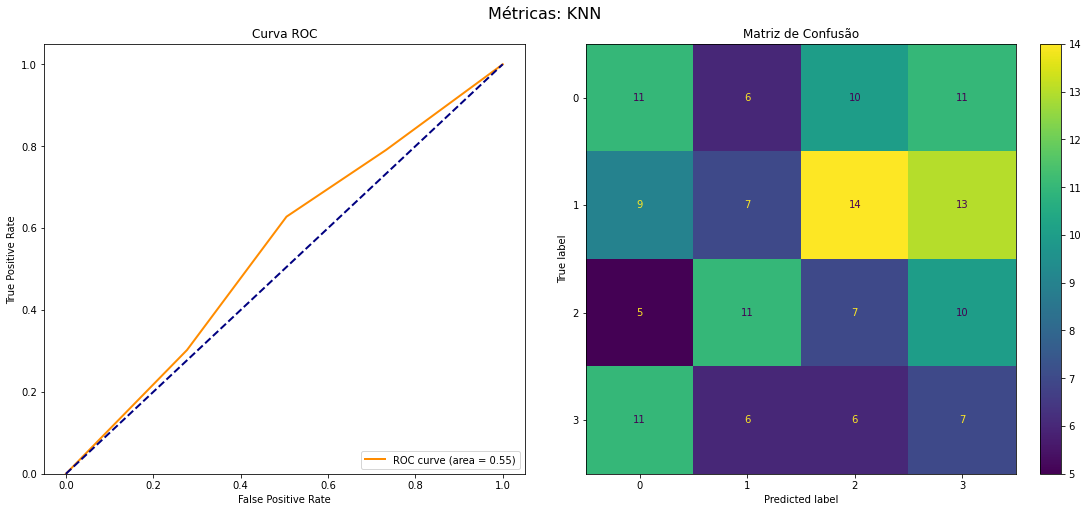

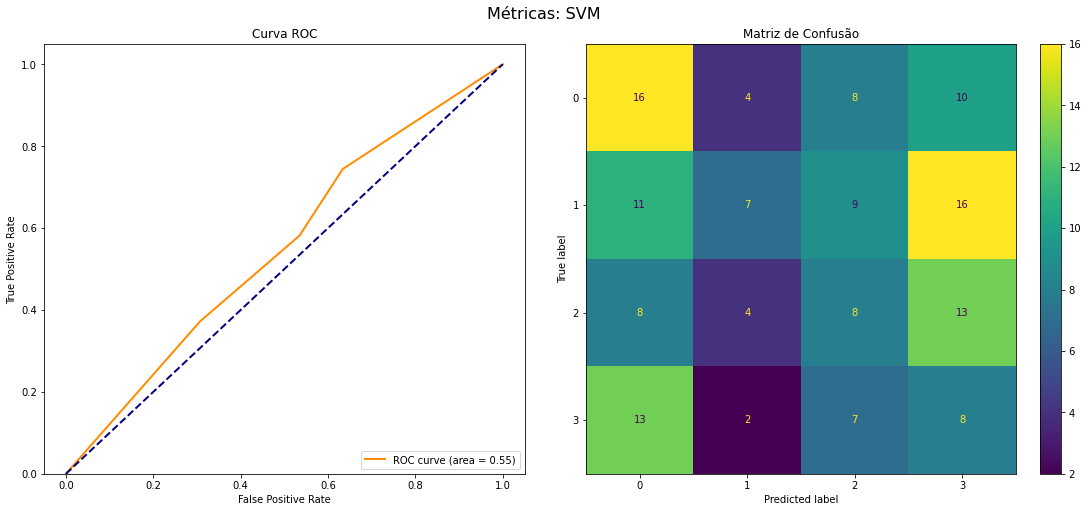

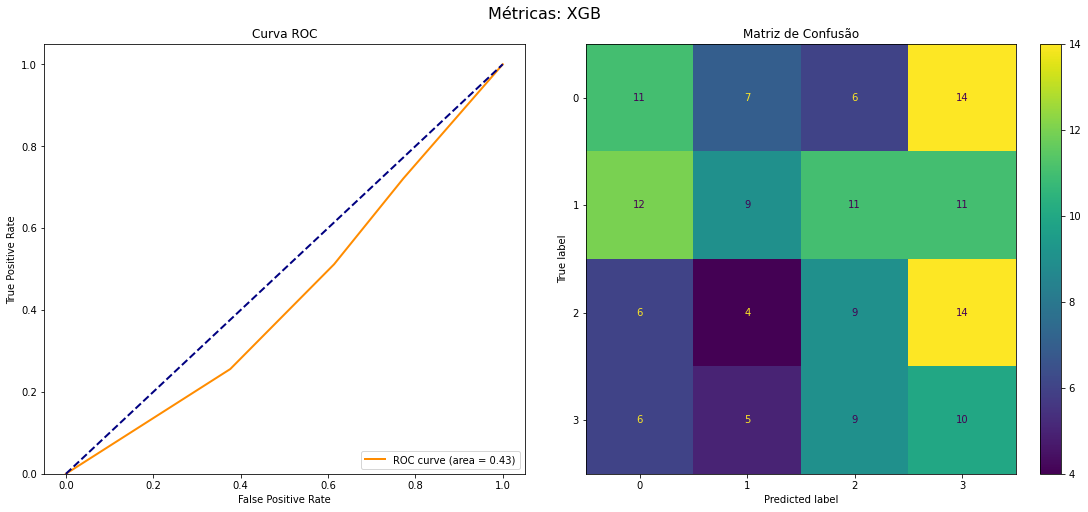

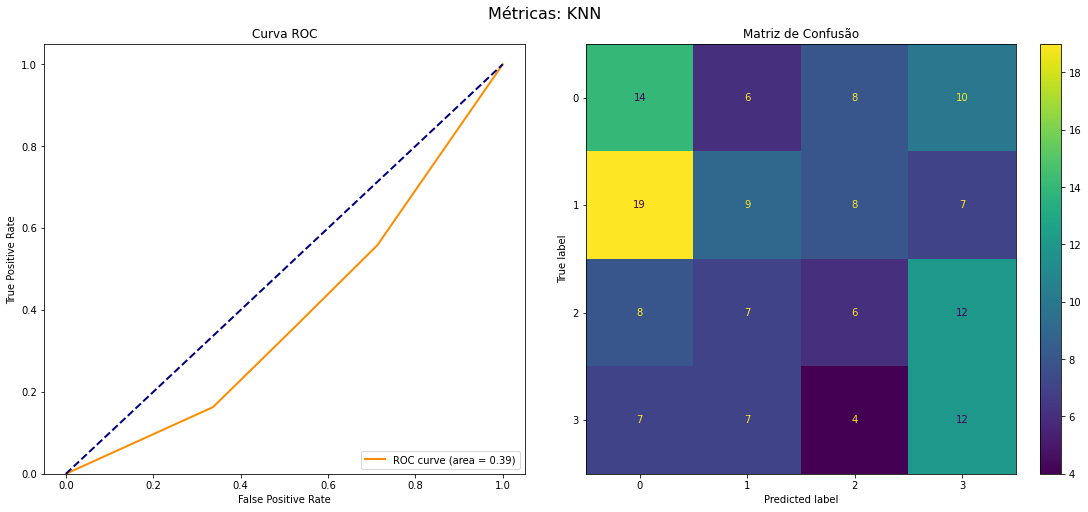

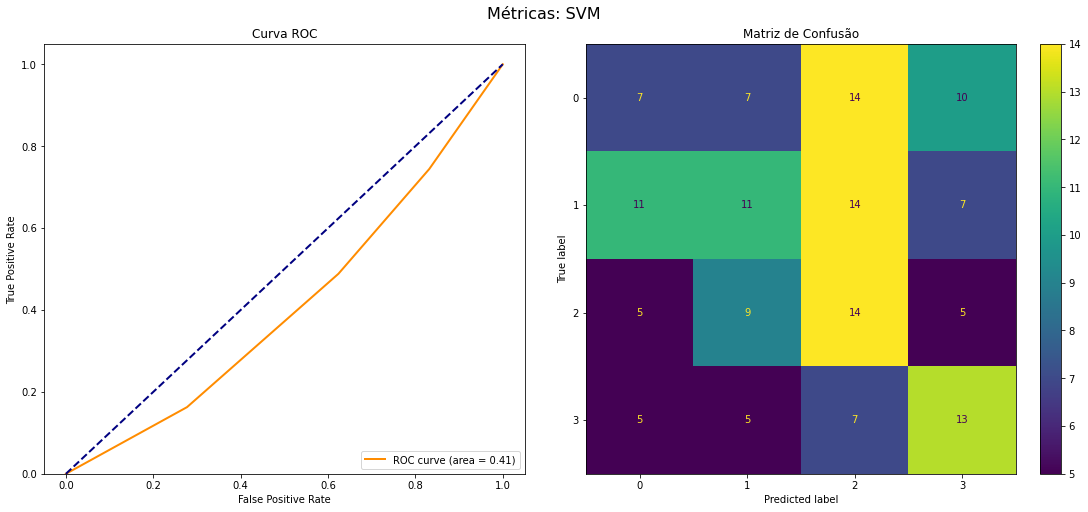

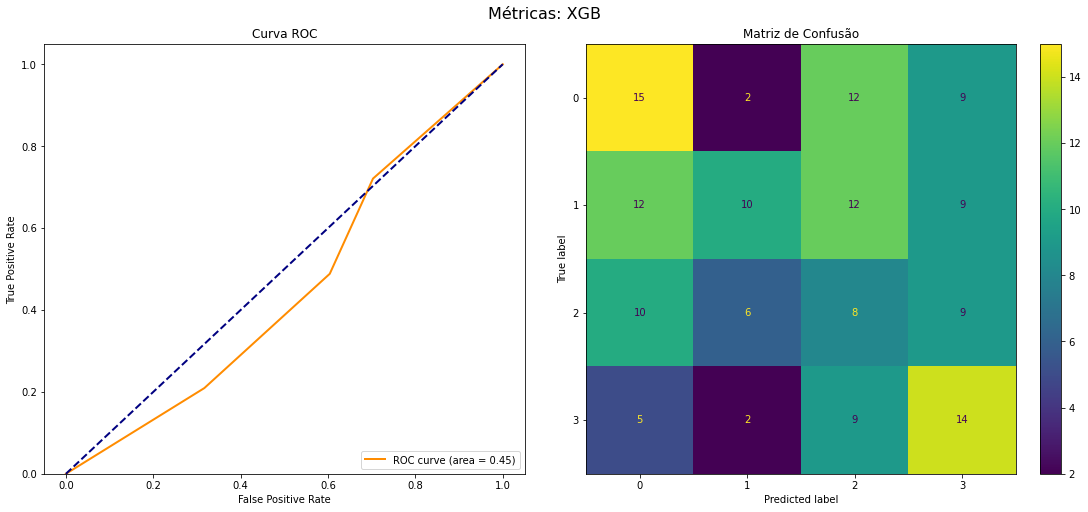

In [27]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_2a_gdf-dataset/'
files = [ file.stem for file in Path(directory).glob('*T.gdf')]
for file in files:
    extension = file + '.gdf'
    x_train_BCICIV, y_train_BCICIV = load_eeg_data_gdf(directory, extension)
    binary = len(np.unique(y_train_BCICIV)) == 2
    run_pipeline(x_train_BCICIV, y_train_BCICIV, "BCICIV_II", file, metrics_results, fs=250, binary=binary)

## Dataset C

### 1. Training all subjects' data at once

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


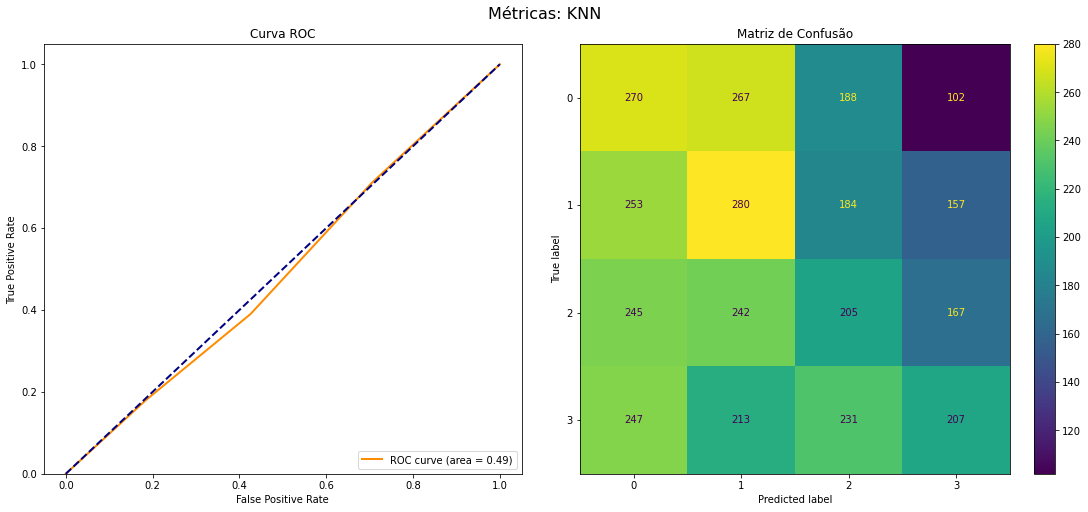

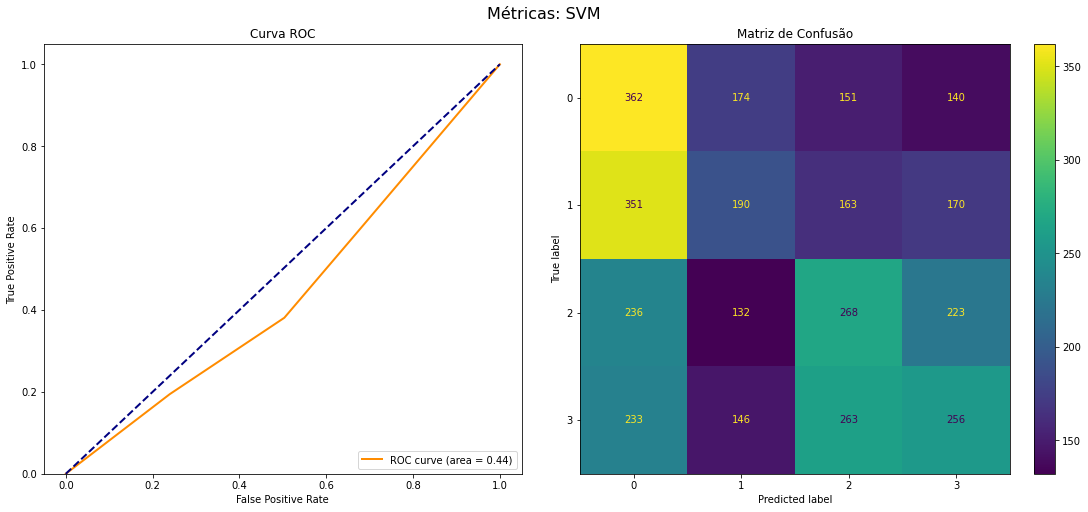

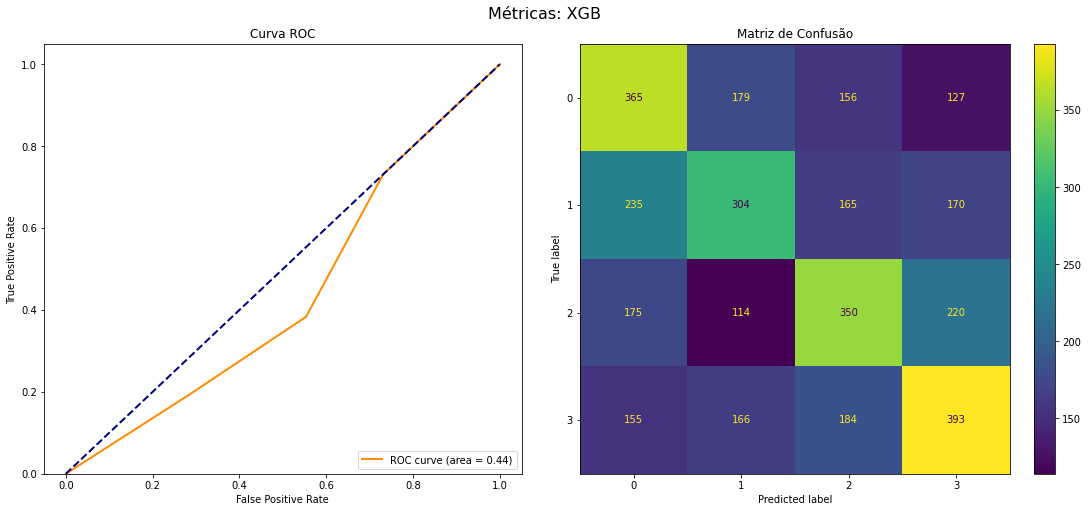

In [28]:
directory = 'C:/Users/Maods/Documents/TCC/data/eeg-motor-movementimagery-dataset/files/'
extension = '**/*.edf'

x_movementimagery, y_movementimagery  = load_eeg_data_edf(directory, extension)
run_pipeline(x_movementimagery, y_movementimagery, "eeg-mi", 'all', metrics_results, fs=160, binary=False)

### 2. Training the subjects' data separately

In [29]:
directory = 'C:/Users/Maods/Documents/TCC/data/eeg-motor-movementimagery-dataset/files/'
extension = '**/*.edf'
files = [ file.name for file in Path(directory).glob('**/*') if len(file.name) == 4]
for file in files:
    x_movementimagery, y_movementimagery  = load_eeg_data_edf(directory + file, extension)
    nb_classes = np.unique(y_movementimagery).shape[0]
    if nb_classes != 4 or len(np.shape(x_movementimagery)) < 3:
        continue
    _, channels, samples = np.shape(x_movementimagery)

    binary = len(np.unique(y_movementimagery)) == 2
    run_pipeline(x_movementimagery, y_movementimagery, "eeg-mi", file, metrics_results, fs=160, binary=binary)

Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S002\S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S002\S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S003\S003R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S003\S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S004\S004R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S004\S004R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S005\S005R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S005\S005R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S007\S007R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S007\S007R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S008\S008R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S008\S008R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S009\S009R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped


c:\Users\Maods\Documents\Repos\EEG-Analysis-\src\utils\plots.py:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15,7))


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S009\S009R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S009\S009R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S010\S010R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S010\S010R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S011\S011R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S011\S011R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S014\S014R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S014\S014R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S015\S015R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S015\S015R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S017\S017R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S017\S017R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S018\S018R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
15 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 15 events and 113 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\Maods\Documents\TCC\data\eeg-motor-movementimagery-dataset\files\S018\S018R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applyi

c:\Users\Maods\Documents\Repos\EEG-Analysis-\env_tcc_eeg\lib\site-packages\scipy\signal\_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  warnings.warn('nperseg = {0:d} is greater than input length '


In [ ]:
result = pd.DataFrame(metrics_results)
result.sort_values(['acc_test','acc_val'], ascending=False).head(30)

In [ ]:
result.to_csv('./artifacts/ml_models_results.csv', index=False, header=True)